In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("1992-2024.csv")

In [7]:
df

,Unnamed: 0,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,...,OPHPBS,MDSP,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED
0,557,5/1/1992,149010,6363.102,1.491591,1.895,408.937,470.2,0.143369,79.2,...,61.794,5.844377,8.84,1139,4204.8,352.2,108799,12.853,-2781,8.6
1,558,6/1/1992,149800,NaN,1.252855,NaN,NaN,480.4,0.357910,80.4,...,NaN,NaN,NaN,1226,4220.9,351.9,108923,12.873,-4455,8.8
2,559,7/1/1992,150761,6566.641,1.253858,1.931,NaN,458.6,0.213980,76.6,...,NaN,NaN,NaN,1186,4255.3,348.3,108954,13.378,-3530,8.6
3,560,8/1/1992,151067,NaN,1.068700,NaN,NaN,466.4,0.284698,76.1,...,62.143,5.802369,NaN,1244,4284.7,350.8,109135,13.655,-3520,9.0
4,561,9/1/1992,152588,NaN,0.983475,NaN,NaN,417.5,0.283889,75.6,...,NaN,NaN,NaN,1214,4300.5,348.7,109280,13.218,-3968,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,931,7/1/2023,599037,27610.128,5.104710,1.330,NaN,890.7,0.190752,71.5,...,NaN,NaN,NaN,1363,18791.5,1573.6,156667,16.270,-62222,9.1
375,932,8/1/2023,603784,NaN,4.306426,NaN,NaN,909.4,0.436716,69.4,...,111.930,4.025787,NaN,1365,18826.8,1606.2,156832,15.919,-64333,8.6
376,933,9/1/2023,608307,NaN,3.322537,NaN,NaN,791.6,0.248513,67.8,...,NaN,NaN,NaN,1510,18903.0,1640.6,157014,16.016,-64754,9.0
377,934,10/1/2023,606596,27956.998,3.182876,1.350,NaN,781.0,-0.038338,63.8,...,NaN,NaN,NaN,1568,19013.7,1656.7,157304,16.574,-64915,9.7


In [8]:
df['DATE'] = pd.to_datetime(df['DATE']) # convert to pd datetime

In [9]:
df = df.interpolate(method='linear')

In [10]:
#initialize the Recession column with 0 (no recession)
df['Recession'] = 0

#define recession periods
recession_periods = [
    ('2001-03-01', '2001-11-30'),
    ('2007-12-01', '2009-06-30'),
    ('2020-02-01', '2020-04-30')
]

#set the recession column to 1 for these periods
for start, end in recession_periods:
    df.loc[(df['DATE'] >= start) & (df['DATE'] <= end), 'Recession'] = 1

In [11]:
df[df['Recession'] == 1]

,Unnamed: 0,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,...,MDSP,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession
106,663,2001-03-01,250328,10556.077000,3.617301,2.067667,789.285167,380.1,0.227531,91.5,...,5.782979,7.308333,1605,7052.8,946.3,132411,16.876,-27095,6.3,1
107,664,2001-04-01,254763,10599.000000,2.397776,2.059000,783.681750,369.3,0.397276,88.4,...,5.774662,7.240000,1636,7069.7,950.4,132296,17.464,-29151,6.0,1
108,665,2001-05-01,255218,10598.673333,1.863222,2.044000,778.078333,327.9,0.452233,92.0,...,5.766344,7.212500,1670,7082.3,952.1,132173,16.463,-29902,6.8,1
109,666,2001-06-01,254022,10598.346667,1.445397,2.029000,772.474917,327.7,0.168824,92.6,...,5.823859,7.185000,1567,7121.7,945.1,132024,16.348,-28094,6.9,1
110,667,2001-07-01,252997,10598.020000,1.692817,2.014000,766.871500,426.4,-0.280899,92.4,...,5.881375,7.157500,1562,7007.0,955.9,131765,16.365,-30217,7.2,1
111,668,2001-08-01,254560,10618.835000,1.593732,2.002667,761.268083,517.4,0.000000,91.5,...,5.938890,7.130000,1540,7212.9,963.6,131452,22.055,-30588,7.3,1
112,669,2001-09-01,249845,10639.650000,0.251696,1.991333,755.664667,539.5,0.450704,81.8,...,5.898821,7.102500,1602,7182.3,963.9,131141,18.031,-30003,7.7,1
113,670,2001-10-01,267999,10660.465000,1.025474,1.980000,750.061250,225.2,-0.336511,82.7,...,5.858752,7.075000,1568,7166.7,964.8,130984,16.465,-27488,8.2,1
114,671,2001-11-01,260514,10701.476667,1.055746,1.976333,744.457833,262.3,-0.168824,83.9,...,5.818683,7.047500,1698,7184.6,953.2,130853,16.523,-29678,8.4,1
187,744,2007-12-01,336189,14709.378000,1.493141,1.951667,950.230583,254.4,-0.067086,75.5,...,7.099481,6.160000,1103,9981.7,1014.1,138326,15.491,-64225,8.7,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def add_sales_t_plus_1(df):
    df = df.copy()
    df['sales_T+1'] = df['sales'].shift(-1)  # shift sales data by -1
    df.dropna(inplace=True)  # drop the last row where sales_T+1 will be NaN
    return df

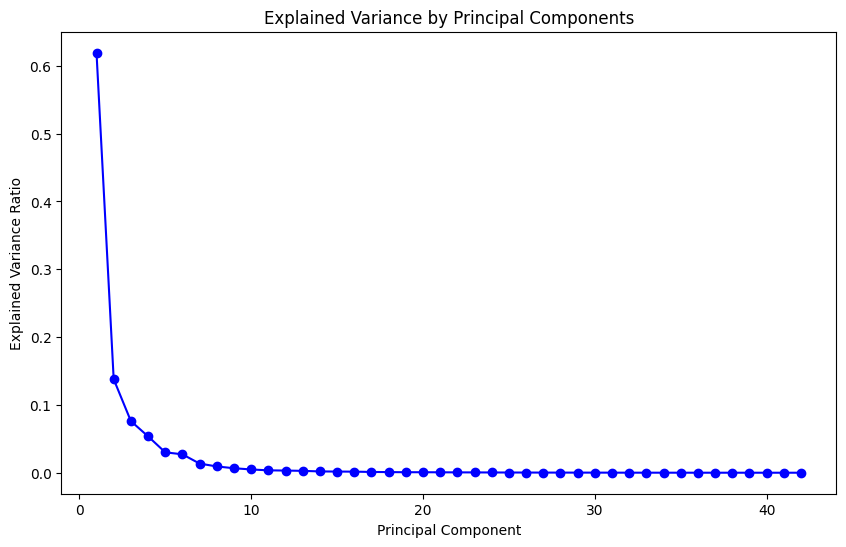

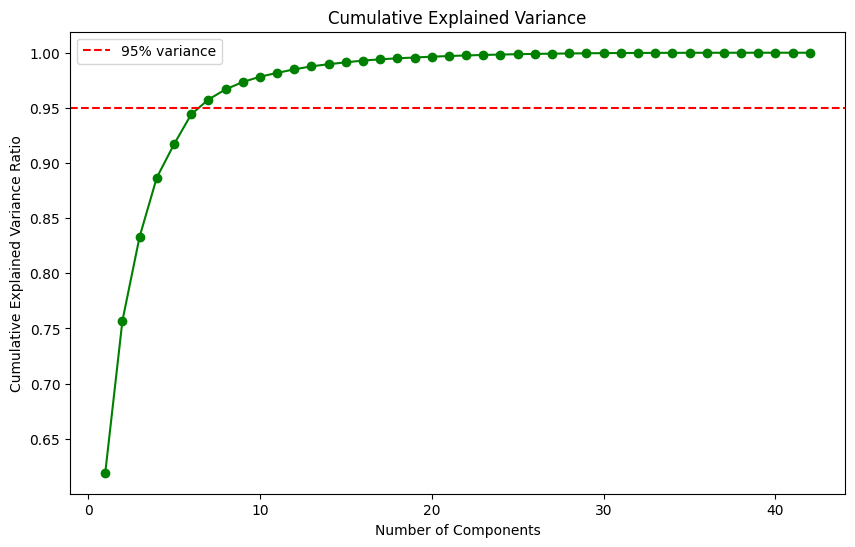

In [22]:
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
dfpca = add_sales_t_plus_1(df)
#drop columns for PCA
features = dfpca.drop(columns=['DATE', 'sales_T+1','Unnamed: 0'])

#scale features
df_scaled = scaler.fit_transform(features)

# Convert back to DataFrame if needed (optional)
df_scaled = pd.DataFrame(df_scaled, columns=features.columns)

# Perform PCA
pca = PCA(n_components=None)
pca.fit(df_scaled)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend(loc='best')
plt.show()

lets take 7 as the number of components, captures more than 95% variance and reduces a lot of dimensionality

# **Research Question:** _How robust are neural network-based sales forecasts to sudden changes in economic conditions (e.g., recessions, booms)?

In [12]:
def build_and_train_lstm(X_train, y_train, X_test, y_test, epoch=100):
    model = Sequential()
    
    # layers in model, and also included dropout=
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))  # Dropout to prevent overfitting
    
    model.add(LSTM(units=75, return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=epoch, batch_size=32)
    
    # Evaluate the model
    mse = model.evaluate(X_test, y_test)
    print(f"Mean Squared Error on Test Set: {mse}")
    
    return model

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2


def preprocess_data(df, look_back=30, n_components=7):
    features = df.drop(columns=['DATE', 'sales_T+1', 'Unnamed: 0'])
    target = df['sales_T+1'].values.reshape(-1, 1)

    # Scale the features
    feature_scaler = MinMaxScaler()
    scaled_features = feature_scaler.fit_transform(features)

    # Scale the target
    target_scaler = MinMaxScaler()
    scaled_target = target_scaler.fit_transform(target)

    # Apply PCA to reduce to n components
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(scaled_features)

    # Combine the PCA-transformed features with the target in a DataFrame
    df_pca = pd.DataFrame(pca_features)
    df_pca['sales_T+1'] = scaled_target

    # Create LSTM input data using the look-back period
    X, y = create_lstm_input_data(df_pca, look_back=look_back)

    return X, y, target_scaler  # return the scaler which is important for inverse transforming predictions


def create_lstm_input_data(df, look_back=12):
    X, y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:(i + look_back)].values)
        y.append(df['sales_T+1'].iloc[i + look_back])
    return np.array(X), np.array(y).reshape(-1, 1)




def evaluate_model(model, X_test, y_test, target_scaler):
    #predict the scaled sales values
    predicted_sales_scaled = model.predict(X_test)
    
    #inverse transform both the predicted and actual scaled values to their original scale
    predicted_sales_original = target_scaler.inverse_transform(predicted_sales_scaled)
    actual_sales_original = target_scaler.inverse_transform(y_test)

    #compare the original sales with the predicted sales
    comparison_df = pd.DataFrame({
        'Actual Sales_T+1': actual_sales_original.flatten(),
        'Predicted Sales_T+1': predicted_sales_original.flatten()
    })

    print(comparison_df.head())

    return comparison_df  # returns the comparison dataframe (might use)

# Function to bring everything together

def build_and_evaluate_model(df, epoch = 50, look_back=30, n_components=8):
    # Add sales_t_plus_1 column
    df = add_sales_t_plus_1(df)
    
    # Preprocess the data
    X_train, y_train, target_scaler = preprocess_data(df, look_back=look_back, n_components=n_components)
    
    # Define the split ratio
    split_ratio = 0.8
    
    # Calculate split index
    split_index = int(len(X_train) * split_ratio)
    
    # Split into training and testing sets (sequentially)
    X_train, X_test = X_train[:split_index], X_train[split_index:]
    y_train, y_test = y_train[:split_index], y_train[split_index:]
    
    # Build and train LSTM model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    # Evaluate the model
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison



In [14]:
def plot_actual_vs_predicted(actual_sales, predicted_sales):
    plt.figure(figsize=(10, 6))
    
    # Plot actual vs predicted
    plt.plot(actual_sales, label='Actua"l Sales_T+1', color='blue', marker='o')
    plt.plot(predicted_sales, label='Predicted Sales_T+1', color='orange', marker='x')
    
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Index')
    plt.ylabel('Sales_T+1')
    plt.legend()
    plt.show()

# FIRST PREDICTION, using sales and indicators from time (T) to predict sales at (T+1)

Epoch 1/50
9/9 [==============================] - 4s 29ms/step - loss: 0.0362 - accuracy: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 

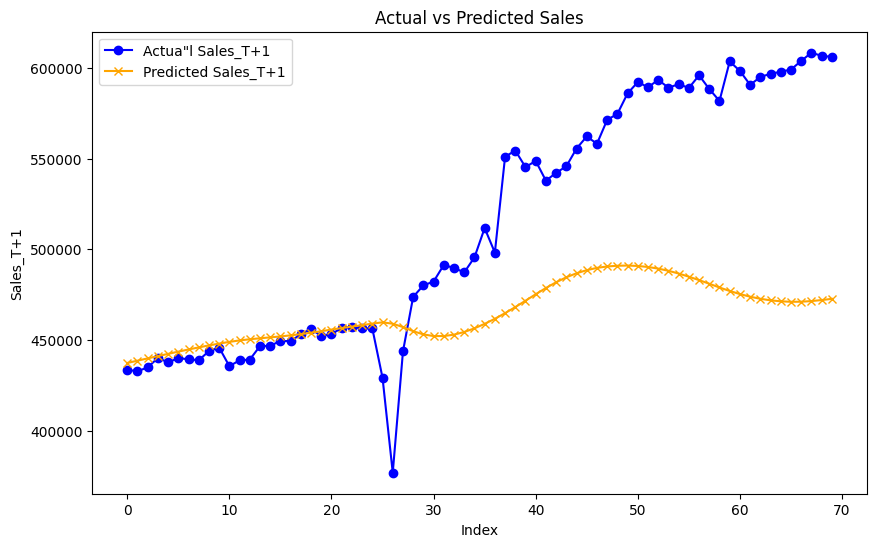

In [446]:
comparison = build_and_evaluate_model(df)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

In [105]:
TEST = df.copy(deep=True)
TEST['DATE'] = pd.to_datetime(df['DATE'])

# Set the 'DATE' as the index
TEST.set_index('DATE', inplace=True)

# Resample to daily frequency and interpolate the missing values

TEST_DAILY = TEST.resample('D').interpolate(method='linear')
TEST_WEEKLY = TEST.resample('W').interpolate(method='linear')

# Reset the index to make 'DATE' a column again
TEST_DAILY.reset_index(inplace=True)
TEST_WEEKLY.reset_index(inplace=True)

test on daily and weekly interpolations

Epoch 1/20
287/287 [==============================] - 5s 11ms/step - loss: 0.0028
Epoch 2/20
287/287 [==============================] - 3s 10ms/step - loss: 7.9391e-04
Epoch 3/20
287/287 [==============================] - 3s 10ms/step - loss: 6.7726e-04
Epoch 4/20
287/287 [==============================] - 3s 10ms/step - loss: 5.0704e-04
Epoch 5/20
287/287 [==============================] - 3s 9ms/step - loss: 4.1623e-04
Epoch 6/20
287/287 [==============================] - 3s 10ms/step - loss: 3.7499e-04
Epoch 7/20
287/287 [==============================] - 3s 9ms/step - loss: 3.4933e-04
Epoch 8/20
287/287 [==============================] - 3s 9ms/step - loss: 2.9983e-04
Epoch 9/20
287/287 [==============================] - 3s 9ms/step - loss: 2.6895e-04
Epoch 10/20
287/287 [==============================] - 3s 10ms/step - loss: 2.5460e-04
Epoch 11/20
287/287 [==============================] - 3s 9ms/step - loss: 2.4446e-04
Epoch 12/20
287/287 [==============================] - 3s 10m

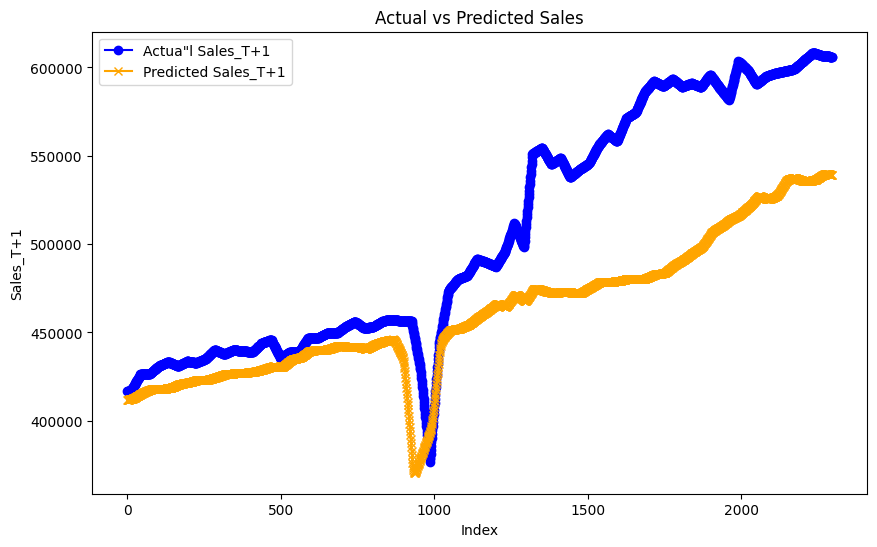

In [128]:
comparison = build_and_evaluate_model(TEST_DAILY)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/80
40/40 [==============================] - 3s 13ms/step - loss: 0.0112
Epoch 2/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 3/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 4/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 5/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 6/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 7/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 8/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 9/80
40/40 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 10/80
40/40 [==============================] - 0s 10ms/step - loss: 8.0794e-04
Epoch 11/80
40/40 [==============================] - 0s 10ms/step - loss: 8.8638e-04
Epoch 12/80
40/40 [==============================] - 0s 10ms/step - loss: 8.8503e-04
Epoch 13/80
40/40 [======

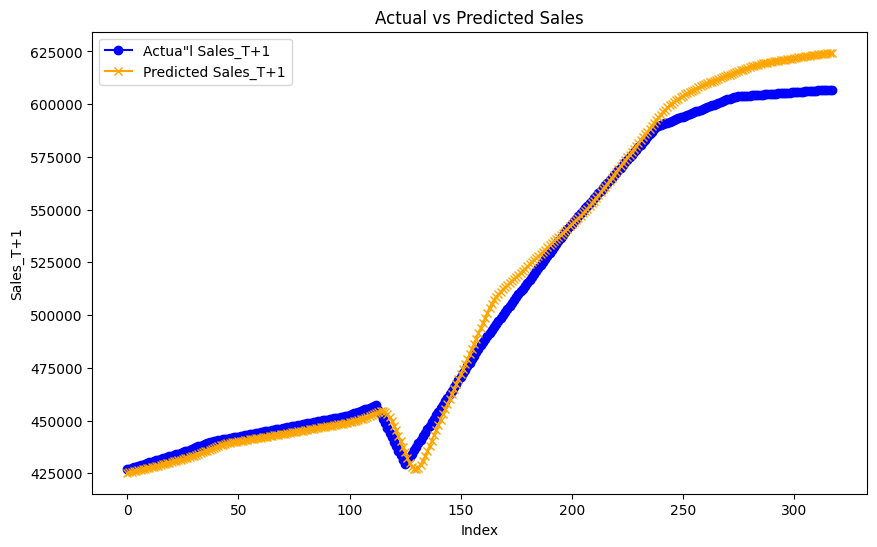

In [136]:
comparison = build_and_evaluate_model(TEST_WEEKLY, 80)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

In [137]:
# df --> monthly data 
# TEST_WEEKLY --> weekly data
# TEST_DAILY --> daily data

Testing on recession vs non-recession data

In [144]:
def build_and_evaluate_model_recession(df, epoch=50, look_back=30, n_components=8):
    #only recession data for training, all for testing, we're trying to see how it well the model performs for covid so test after 2019
    train_data = df[(df['DATE'] < '2019-01-01') & (df['Recession'] == 1)]
    test_data = df[df['DATE'] >= '2019-01-01']
    
    # add sales_t_plus_1 column to both training and testing data to support lookback
    train_data = add_sales_t_plus_1(train_data)
    test_data = add_sales_t_plus_1(test_data)
    
    X_train, y_train, target_scaler = preprocess_data(train_data, look_back=look_back, n_components=n_components)
    
    X_test, y_test, _ = preprocess_data(test_data, look_back=look_back, n_components=n_components)
    #build model
    # Debugging: Print shapes of the preprocessed data
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    #evaluate on test
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison

X_train shape: (26, 1, 9)
y_train shape: (26, 1)
X_test shape: (57, 1, 9)
y_test shape: (57, 1)
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.4704
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 0.4663
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 0.4605
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 0.4545
Epoch 5/200
1/1 [==============================] - 0s 14ms/step - loss: 0.4488
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4450
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 0.4376
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4332
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4269
Epoch 10/200
1/1 [==============================] - 0s 15ms/step - loss: 0.4217
Epoch 11/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4125
Epoch 12/200
1/1 [=================

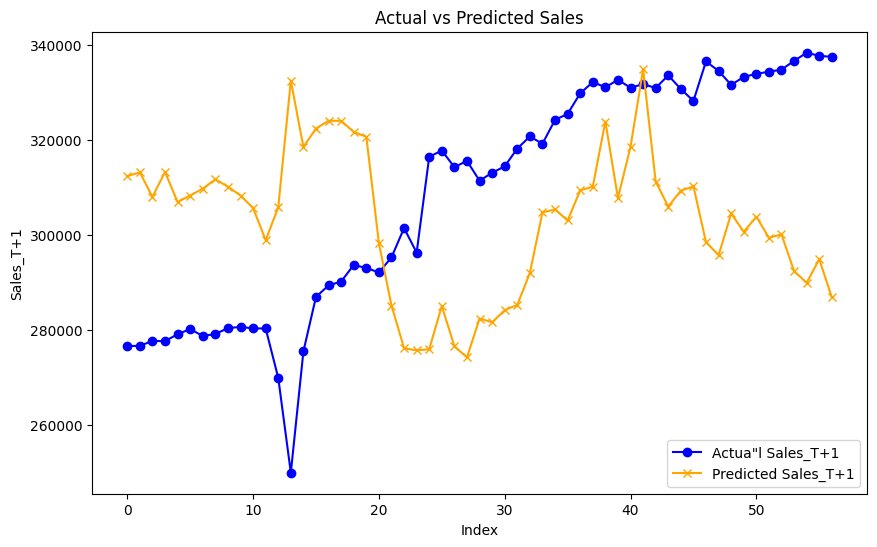

In [166]:
comparison_recession = build_and_evaluate_model_recession(df, epoch=200, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

X_train shape: (793, 1, 9)
y_train shape: (793, 1)
X_test shape: (1764, 1, 9)
y_test shape: (1764, 1)
Epoch 1/100
25/25 [==============================] - 4s 10ms/step - loss: 0.3557
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0636
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 10/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 11/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 12/100
2

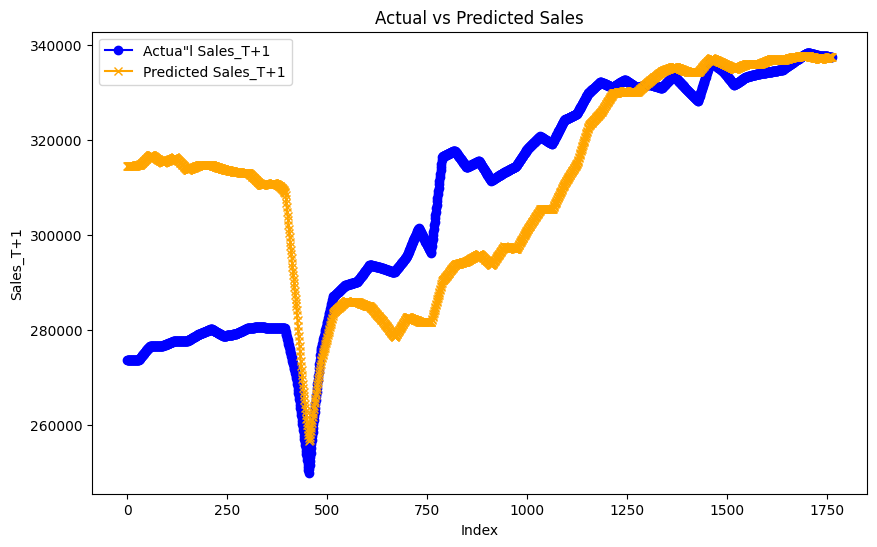

In [164]:
comparison_recession = build_and_evaluate_model_recession(TEST_DAILY, epoch=100, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

X_train shape: (52, 1, 9)
y_train shape: (52, 1)
X_test shape: (251, 1, 9)
y_test shape: (251, 1)
Epoch 1/35
2/2 [==============================] - 4s 19ms/step - loss: 0.4307 - accuracy: 0.0192
Epoch 2/35
2/2 [==============================] - 0s 14ms/step - loss: 0.4196 - accuracy: 0.0192
Epoch 3/35
2/2 [==============================] - 0s 16ms/step - loss: 0.4082 - accuracy: 0.0192
Epoch 4/35
2/2 [==============================] - 0s 15ms/step - loss: 0.3970 - accuracy: 0.0192
Epoch 5/35
2/2 [==============================] - 0s 15ms/step - loss: 0.3851 - accuracy: 0.0192
Epoch 6/35
2/2 [==============================] - 0s 14ms/step - loss: 0.3688 - accuracy: 0.0192
Epoch 7/35
2/2 [==============================] - 0s 14ms/step - loss: 0.3530 - accuracy: 0.0192
Epoch 8/35
2/2 [==============================] - 0s 13ms/step - loss: 0.3401 - accuracy: 0.0192
Epoch 9/35
2/2 [==============================] - 0s 15ms/step - loss: 0.3152 - accuracy: 0.0192
Epoch 10/35
2/2 [============

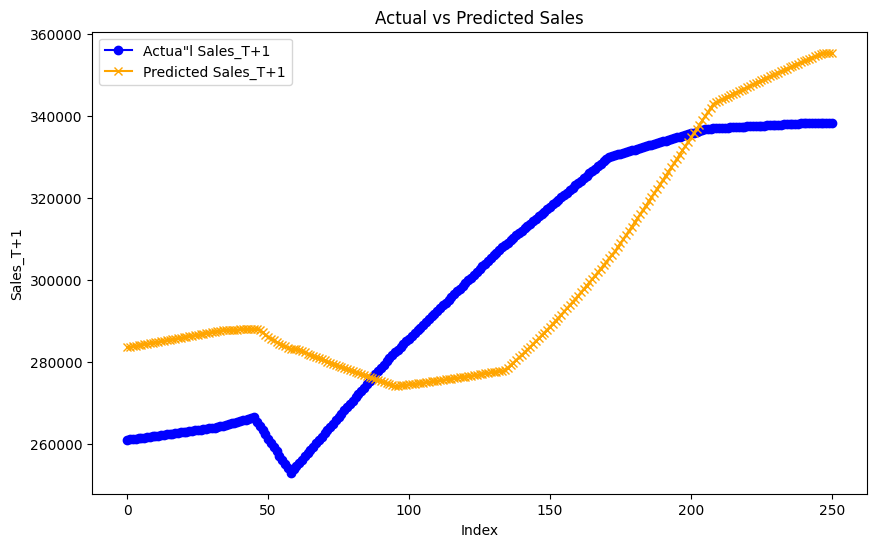

In [443]:
comparison_recession = build_and_evaluate_model_recession(TEST_WEEKLY, epoch=35, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

In [167]:
def build_and_evaluate_model_nonrecession(df, epoch=50, look_back=30, n_components=8):
    #only recession data for training, all for testing, we're trying to see how it well the model performs for covid so test after 2019
    train_data = df[(df['DATE'] < '2019-01-01') & (df['Recession'] == 0)]
    test_data = df[df['DATE'] >= '2019-01-01']
    
    # add sales_t_plus_1 column to both training and testing data to support lookback
    train_data = add_sales_t_plus_1(train_data)
    test_data = add_sales_t_plus_1(test_data)
    
    X_train, y_train, target_scaler = preprocess_data(train_data, look_back=look_back, n_components=n_components)
    
    X_test, y_test, _ = preprocess_data(test_data, look_back=look_back, n_components=n_components)
    #build model
    # Debugging: Print shapes of the preprocessed data
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    #evaluate on test
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison

X_train shape: (290, 1, 9)
y_train shape: (290, 1)
X_test shape: (57, 1, 9)
y_test shape: (57, 1)
Epoch 1/30
10/10 [==============================] - 3s 12ms/step - loss: 0.2967
Epoch 2/30
10/10 [==============================] - 0s 11ms/step - loss: 0.2402
Epoch 3/30
10/10 [==============================] - 0s 11ms/step - loss: 0.1469
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 0.0360
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 6/30
10/10 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 7/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 8/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 9/30
10/10 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 10/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 11/30
10/10 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 12/30
10/10 [=======

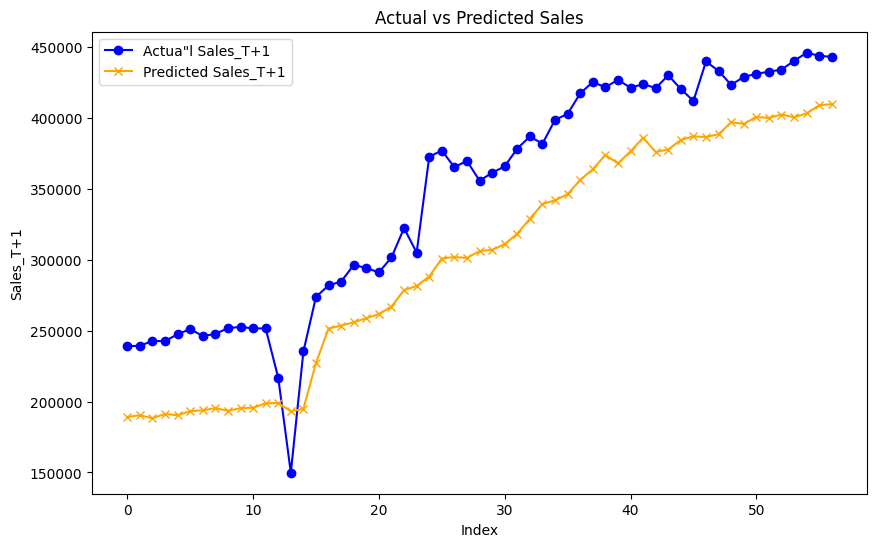

In [169]:
comparison_recession = build_and_evaluate_model_nonrecession(df, epoch=30, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

X_train shape: (8830, 1, 9)
y_train shape: (8830, 1)
X_test shape: (1764, 1, 9)
y_test shape: (1764, 1)
Epoch 1/7
276/276 [==============================] - 6s 9ms/step - loss: 0.0302 - accuracy: 1.1325e-04
Epoch 2/7
276/276 [==============================] - 3s 9ms/step - loss: 0.0027 - accuracy: 1.1325e-04
Epoch 3/7
276/276 [==============================] - 3s 9ms/step - loss: 0.0024 - accuracy: 1.1325e-04
Epoch 4/7
276/276 [==============================] - 2s 9ms/step - loss: 0.0021 - accuracy: 1.1325e-04
Epoch 5/7
276/276 [==============================] - 2s 9ms/step - loss: 0.0019 - accuracy: 1.1325e-04
Epoch 6/7
276/276 [==============================] - 2s 9ms/step - loss: 0.0018 - accuracy: 1.1325e-04
Epoch 7/7
56/56 [==============================] - 1s 6ms/step - loss: 0.2097 - accuracy: 0.0000e+00
Mean Squared Error on Test Set: [0.20966297388076782, 0.0]
56/56 [==============================] - 1s 3ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     228523.047859     

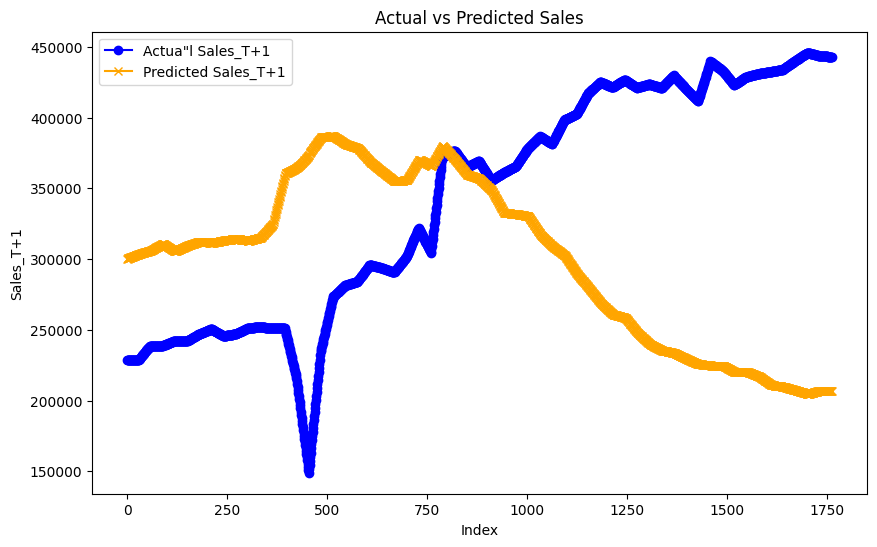

In [447]:
comparison_recession = build_and_evaluate_model_nonrecession(TEST_DAILY, epoch=7, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

X_train shape: (1144, 1, 9)
y_train shape: (1144, 1)
X_test shape: (251, 1, 9)
y_test shape: (251, 1)
Epoch 1/3
36/36 [==============================] - 4s 10ms/step - loss: 0.1934
Epoch 2/3
36/36 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 3/3
8/8 [==============================] - 1s 5ms/step - loss: 0.2828
Mean Squared Error on Test Set: 0.2827543020248413
8/8 [==============================] - 1s 5ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     181131.275817         267398.28125
1     181459.977148         267720.34375
2     181788.678480         268114.90625
3     182117.379812         268452.34375
4     182446.081143         268797.56250


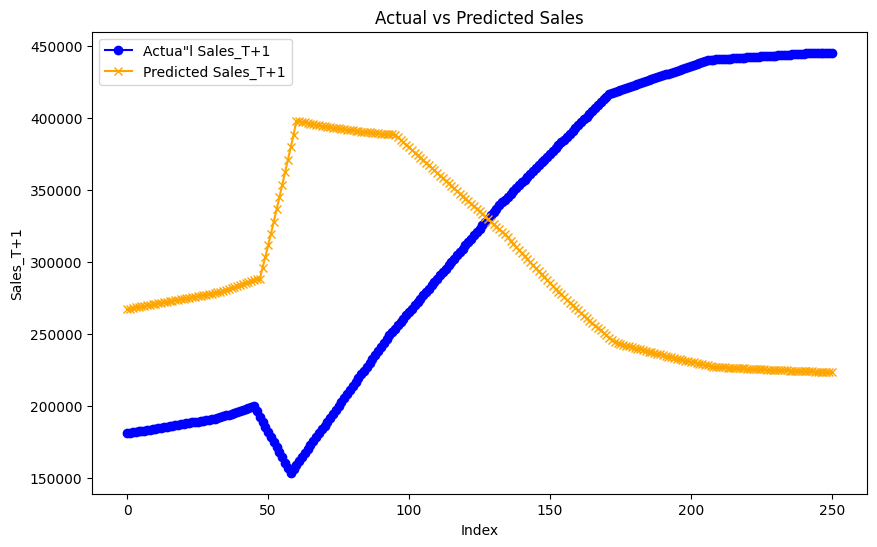

In [172]:
comparison_recession = build_and_evaluate_model_nonrecession(TEST_WEEKLY, epoch=3, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

# **Research Question:** How does the inclusion of different versions of lagged sales data improve forecasting accuracy?

Lets create a few dataframes, each containing different versions of lagged sales data

In [186]:
df_RQ2 = df.drop(columns='Unnamed: 0')

In [187]:
df_RQ2

,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,...,MDSP,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession
0,1992-05-01,149010,6363.102000,1.491591,1.895000,408.937,470.2,0.143369,79.2,66.6,...,5.844377,8.840000,1139,4204.8,352.2,108799,12.853,-2781,8.6,0
1,1992-06-01,149800,6464.871500,1.252855,1.913000,412.160,480.4,0.357910,80.4,66.7,...,5.830374,8.710000,1226,4220.9,351.9,108923,12.873,-4455,8.8,0
2,1992-07-01,150761,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,...,5.816372,8.580000,1186,4255.3,348.3,108954,13.378,-3530,8.6,0
3,1992-08-01,151067,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,...,5.802369,8.450000,1244,4284.7,350.8,109135,13.655,-3520,9.0,0
4,1992-09-01,152588,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,...,5.792739,8.320000,1214,4300.5,348.7,109280,13.218,-3968,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2023-07-01,599037,27610.128000,5.104710,1.330000,1620.801,890.7,0.190752,71.5,62.6,...,4.013651,6.721429,1363,18791.5,1573.6,156667,16.270,-62222,9.1,0
375,2023-08-01,603784,27725.751333,4.306426,1.336667,1620.801,909.4,0.436716,69.4,62.8,...,4.025787,6.698571,1365,18826.8,1606.2,156832,15.919,-64333,8.6,0
376,2023-09-01,608307,27841.374667,3.322537,1.343333,1620.801,791.6,0.248513,67.8,62.8,...,4.015577,6.675714,1510,18903.0,1640.6,157014,16.016,-64754,9.0,0
377,2023-10-01,606596,27956.998000,3.182876,1.350000,1620.801,781.0,-0.038338,63.8,62.7,...,4.005366,6.652857,1568,19013.7,1656.7,157304,16.574,-64915,9.7,0


In [188]:
#add columns for sales_change, and whether sales change is positive (1 for yes, else 0)
df_RQ2['sales_change'] = df_RQ2['sales'].diff()
df_RQ2.dropna(inplace=True)
df_RQ2['sales_change_positive'] = df_RQ2['sales_change'].apply(lambda x: 1 if x > 0 else 0)
df_RQ2.dropna(inplace=True)
df_RQ2['sales_pct_change'] = df_RQ2['sales'].pct_change() * 100
df_RQ2.dropna(inplace=True)
# The new DataFrame with the indicator
df_RQ2

,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,...,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_change,sales_change_positive,sales_pct_change
2,1992-07-01,150761,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,...,4255.3,348.3,108954,13.378,-3530,8.6,0,961.0,1,0.641522
3,1992-08-01,151067,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,...,4284.7,350.8,109135,13.655,-3520,9.0,0,306.0,1,0.202970
4,1992-09-01,152588,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,...,4300.5,348.7,109280,13.218,-3968,9.0,0,1521.0,1,1.006838
5,1992-10-01,153521,6680.803000,0.736321,1.951000,425.052,379.1,0.353857,73.3,66.2,...,4336.4,344.8,109500,13.784,-5603,9.3,0,933.0,1,0.611450
6,1992-11-01,153583,6697.021667,0.907034,1.957667,428.275,380.3,0.141044,85.3,66.3,...,4340.7,344.3,109795,13.457,-3871,8.6,0,62.0,1,0.040385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2023-07-01,599037,27610.128000,5.104710,1.330000,1620.801,890.7,0.190752,71.5,62.6,...,18791.5,1573.6,156667,16.270,-62222,9.1,0,1211.0,1,0.202567
375,2023-08-01,603784,27725.751333,4.306426,1.336667,1620.801,909.4,0.436716,69.4,62.8,...,18826.8,1606.2,156832,15.919,-64333,8.6,0,4747.0,1,0.792439
376,2023-09-01,608307,27841.374667,3.322537,1.343333,1620.801,791.6,0.248513,67.8,62.8,...,18903.0,1640.6,157014,16.016,-64754,9.0,0,4523.0,1,0.749109
377,2023-10-01,606596,27956.998000,3.182876,1.350000,1620.801,781.0,-0.038338,63.8,62.7,...,19013.7,1656.7,157304,16.574,-64915,9.7,0,-1711.0,0,-0.281272


In [189]:
# 1. Create DataFrame for sales_change
df_sales_change = df_RQ2.copy()
df_sales_change['sales_change_t+1'] = df_sales_change['sales_change'].shift(-1)
df_sales_change = df_sales_change.drop(columns=['sales_change_positive', 'sales_pct_change'])
df_sales_change.dropna(inplace=True)

# 2. Create DataFrame for sales_change_positive
df_sales_change_positive = df_RQ2.copy()
df_sales_change_positive['sales_change_positive_t+1'] = df_sales_change_positive['sales_change_positive'].shift(-1)
df_sales_change_positive = df_sales_change_positive.drop(columns=['sales_change', 'sales_pct_change'])
df_sales_change_positive.dropna(inplace=True)

# 3. Create DataFrame for sales_pct_change
df_sales_pct_change = df_RQ2.copy()
df_sales_pct_change['sales_pct_change_t+1'] = df_sales_pct_change['sales_pct_change'].shift(-1)
df_sales_pct_change = df_sales_pct_change.drop(columns=['sales_change', 'sales_change_positive'])
df_sales_pct_change.dropna(inplace=True)

In [202]:
df_sales_change.head()

,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,...,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_change,sales_change_t+1
2,1992-07-01,150761,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,...,1186,4255.3,348.3,108954,13.378,-3530,8.6,0,961.0,306.0
3,1992-08-01,151067,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,...,1244,4284.7,350.8,109135,13.655,-3520,9.0,0,306.0,1521.0
4,1992-09-01,152588,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,...,1214,4300.5,348.7,109280,13.218,-3968,9.0,0,1521.0,933.0
5,1992-10-01,153521,6680.803000,0.736321,1.951000,425.052,379.1,0.353857,73.3,66.2,...,1227,4336.4,344.8,109500,13.784,-5603,9.3,0,933.0,62.0
6,1992-11-01,153583,6697.021667,0.907034,1.957667,428.275,380.3,0.141044,85.3,66.3,...,1210,4340.7,344.3,109795,13.457,-3871,8.6,0,62.0,2031.0


In [203]:
df_sales_change_positive.head()

,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,...,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_change_positive,sales_change_positive_t+1
2,1992-07-01,150761,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,...,1186,4255.3,348.3,108954,13.378,-3530,8.6,0,1,1.0
3,1992-08-01,151067,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,...,1244,4284.7,350.8,109135,13.655,-3520,9.0,0,1,1.0
4,1992-09-01,152588,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,...,1214,4300.5,348.7,109280,13.218,-3968,9.0,0,1,1.0
5,1992-10-01,153521,6680.803000,0.736321,1.951000,425.052,379.1,0.353857,73.3,66.2,...,1227,4336.4,344.8,109500,13.784,-5603,9.3,0,1,1.0
6,1992-11-01,153583,6697.021667,0.907034,1.957667,428.275,380.3,0.141044,85.3,66.3,...,1210,4340.7,344.3,109795,13.457,-3871,8.6,0,1,1.0


In [204]:
df_sales_pct_change.head()

,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,...,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_pct_change,sales_pct_change_t+1
2,1992-07-01,150761,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,...,1186,4255.3,348.3,108954,13.378,-3530,8.6,0,0.641522,0.202970
3,1992-08-01,151067,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,...,1244,4284.7,350.8,109135,13.655,-3520,9.0,0,0.202970,1.006838
4,1992-09-01,152588,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,...,1214,4300.5,348.7,109280,13.218,-3968,9.0,0,1.006838,0.611450
5,1992-10-01,153521,6680.803000,0.736321,1.951000,425.052,379.1,0.353857,73.3,66.2,...,1227,4336.4,344.8,109500,13.784,-5603,9.3,0,0.611450,0.040385
6,1992-11-01,153583,6697.021667,0.907034,1.957667,428.275,380.3,0.141044,85.3,66.3,...,1210,4340.7,344.3,109795,13.457,-3871,8.6,0,0.040385,1.322412


In [3]:
def preprocess_data_custom(df, columnstodrop, targetedcolumn, look_back=1, n_components=7):
    features = df.drop(columns=columnstodrop)
    target = df[targetedcolumn].values.reshape(-1, 1)

    # Scale the features
    feature_scaler = MinMaxScaler()
    scaled_features = feature_scaler.fit_transform(features)

    # Scale the target
    target_scaler = MinMaxScaler()
    scaled_target = target_scaler.fit_transform(target)

    # Apply PCA to reduce to n components
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(scaled_features)

    # Combine the PCA-transformed features with the target in a DataFrame
    df_pca = pd.DataFrame(pca_features)
    df_pca['sales_T+1'] = scaled_target

    # Create LSTM input data using the look-back period
    X, y = create_lstm_input_data(df_pca, look_back=look_back)

    return X, y, target_scaler  # return the scaler which is important for inverse transforming predictions
def build_and_evaluate_modelcustom(df, columnstodrop, targetedcolumn, epoch = 50, look_back=30, n_components = 7):
    # Add sales_t_plus_1 column
    # df = add_sales_t_plus_1(df)
    
    # Preprocess the data
    X_train, y_train, target_scaler = preprocess_data_custom(df, columnstodrop, targetedcolumn, look_back=look_back)
    
    # Define the split ratio
    split_ratio = 0.8
    
    # Calculate split index
    split_index = int(len(X_train) * split_ratio)
    
    # Split into training and testing sets (sequentially)
    X_train, X_test = X_train[:split_index], X_train[split_index:]
    y_train, y_test = y_train[:split_index], y_train[split_index:]
    
    # Build and train LSTM model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    # Evaluate the model
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison

Epoch 1/100
10/10 [==============================] - 3s 14ms/step - loss: 0.1539 - accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0425 - accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 10ms/st

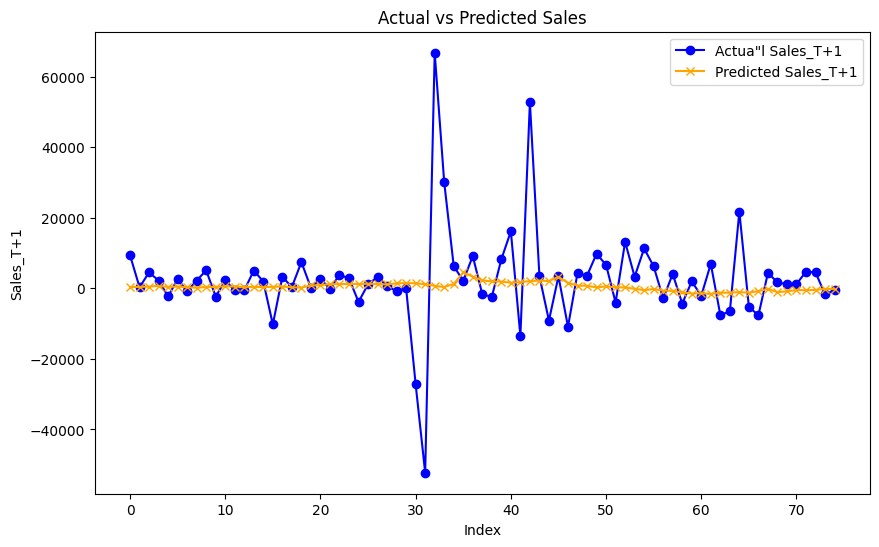

In [445]:
comparison_recession = build_and_evaluate_modelcustom(df_sales_change, ['DATE', 'sales_change_t+1'], 'sales_change_t+1', epoch=100, look_back=3, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/100
10/10 [==============================] - 3s 12ms/step - loss: 0.6781 - accuracy: 0.2943
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5971 - accuracy: 0.2943
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4650 - accuracy: 0.2943
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2997 - accuracy: 0.4348
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2517 - accuracy: 0.6589
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2293 - accuracy: 0.6254
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2252 - accuracy: 0.6421
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2243 - accuracy: 0.6756
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2138 - accuracy: 0.6923
Epoch 10/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2169 - accuracy: 0.6756

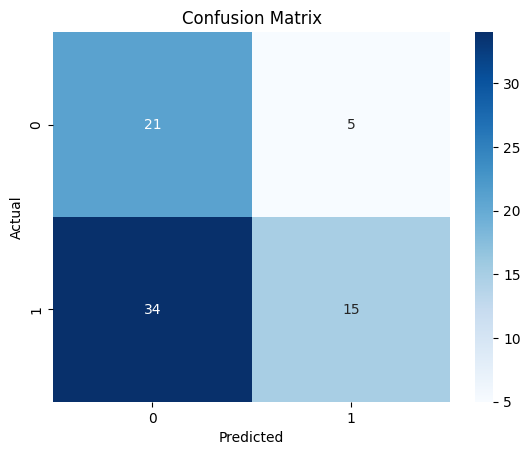

In [235]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import seaborn as sns
comparison_recession = build_and_evaluate_modelcustom(df_sales_change_positive, ['DATE', 'sales_change_positive_t+1'], 'sales_change_positive_t+1', epoch=100, look_back=1, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

# Apply thresholding to the predicted values
predicted_thresholded = np.where(predicted >= 0.5, 1, 0)


cm = confusion_matrix(actual, predicted_thresholded)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Epoch 1/100
10/10 [==============================] - 3s 13ms/step - loss: 0.1253 - accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 10ms/st

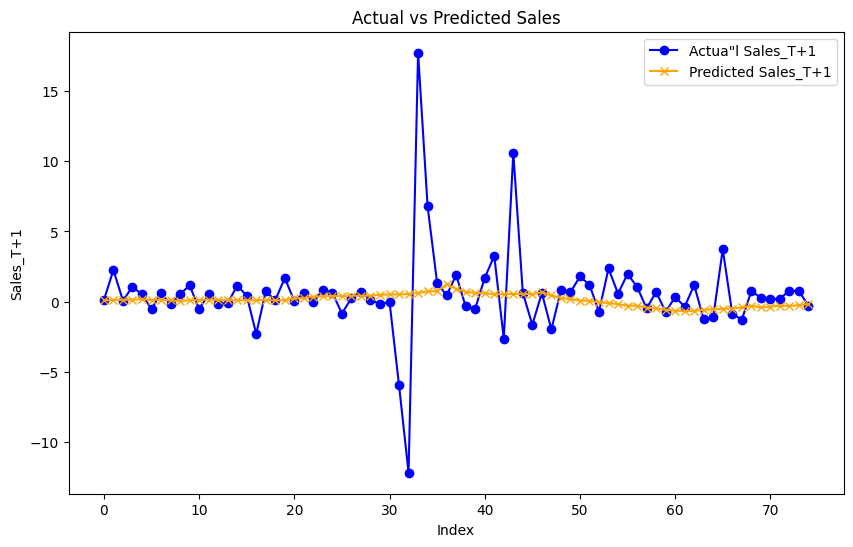

In [236]:
comparison_recession = build_and_evaluate_modelcustom(df_sales_pct_change, ['DATE', 'sales_pct_change_t+1'], 'sales_pct_change_t+1', epoch=100, look_back=3, n_components=8)
actual = comparison_recession['Actual Sales_T+1']
predicted = comparison_recession['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

# How do the sales prediction accuracy differs when using lagged sales features for different time steps (i.e., different lookback periods)

Epoch 1/200
10/10 [==============================] - 3s 11ms/step - loss: 0.1044
Epoch 2/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0754
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0354
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 8/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 9/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 10/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 11/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 12/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 13/200
10/10 [=============

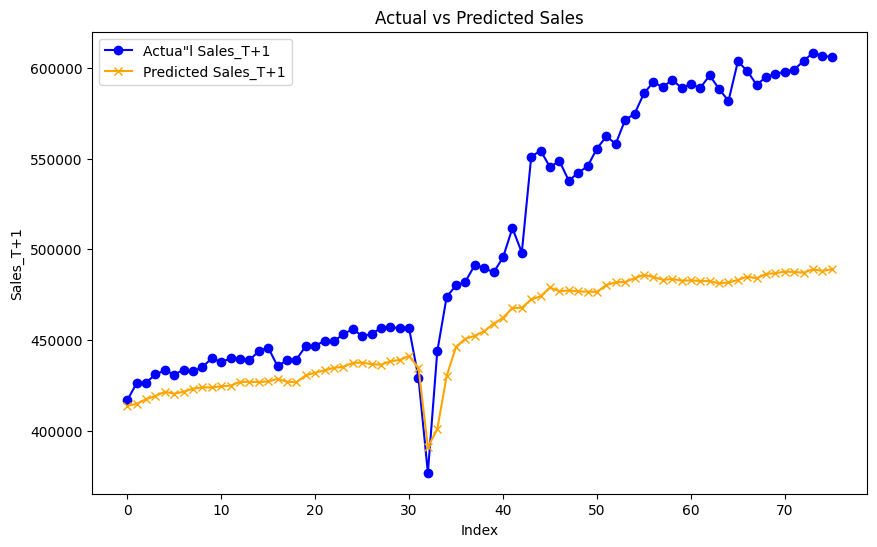

In [254]:
comparison = build_and_evaluate_model(df, epoch = 200, look_back = 1)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/200
10/10 [==============================] - 3s 14ms/step - loss: 0.0813
Epoch 2/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0138
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0031
Epoch 5/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 6/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 8/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 9/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 11/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 12/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 13/200
10/10 [=====

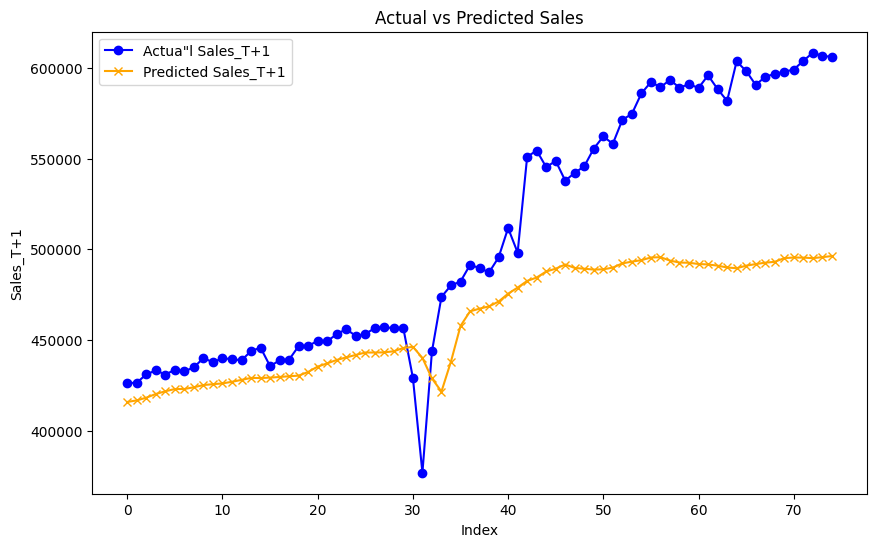

In [255]:
comparison = build_and_evaluate_model(df, epoch = 200, look_back = 3)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/200
10/10 [==============================] - 4s 18ms/step - loss: 0.0394
Epoch 2/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0070
Epoch 3/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 5/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 6/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 7/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 8/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 9/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 10/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 11/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 12/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 13/200
10/10 [=====

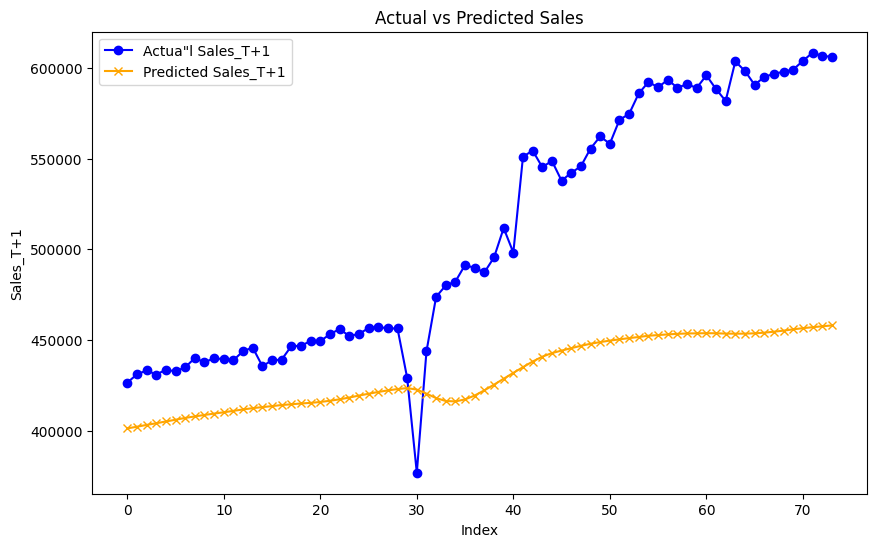

In [256]:
comparison = build_and_evaluate_model(df, epoch = 200, look_back = 12)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/200
9/9 [==============================] - 4s 25ms/step - loss: 0.0469
Epoch 2/200
9/9 [==============================] - 0s 17ms/step - loss: 0.0102
Epoch 3/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 4/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0037
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 6/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 7/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 8/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 9/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 10/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 11/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 12/200
9/9 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 13/200
9/9 [==============================]

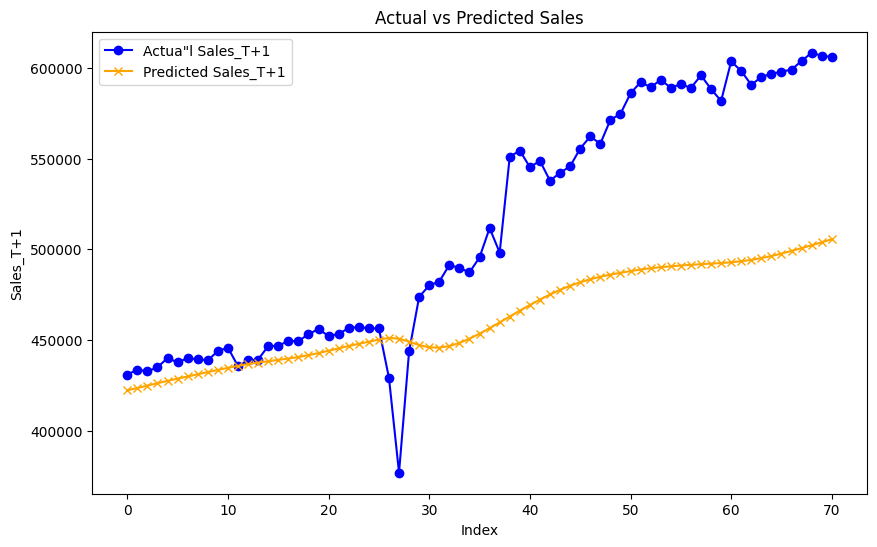

In [257]:
comparison = build_and_evaluate_model(df, epoch = 200, look_back = 24)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/3
288/288 [==============================] - 6s 9ms/step - loss: 0.0100
Epoch 2/3
288/288 [==============================] - 2s 8ms/step - loss: 8.8247e-04
Epoch 3/3
72/72 [==============================] - 1s 4ms/step - loss: 0.0326
Mean Squared Error on Test Set: 0.03255036100745201
72/72 [==============================] - 1s 4ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416609.838710         397523.75000
1     416624.612903         397561.28125
2     416639.387097         397603.68750
3     416654.161290         397642.09375
4     416668.935484         397686.78125


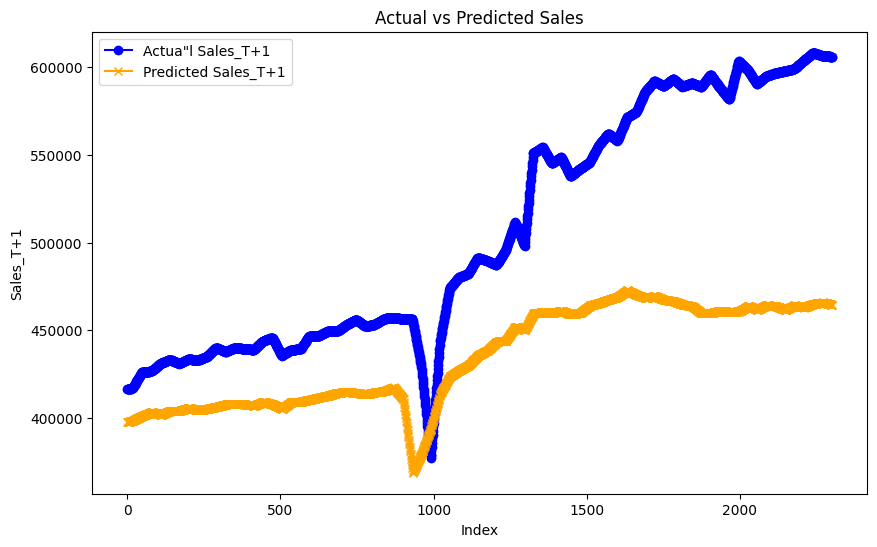

In [262]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 3, look_back = 1)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/3
288/288 [==============================] - 6s 10ms/step - loss: 0.0033
Epoch 2/3
288/288 [==============================] - 3s 10ms/step - loss: 7.4971e-04
Epoch 3/3
72/72 [==============================] - 1s 4ms/step - loss: 0.0154
Mean Squared Error on Test Set: 0.015392528846859932
72/72 [==============================] - 1s 4ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416624.612903         416425.68750
1     416639.387097         416469.65625
2     416654.161290         416502.21875
3     416668.935484         416541.75000
4     416683.709677         416589.00000


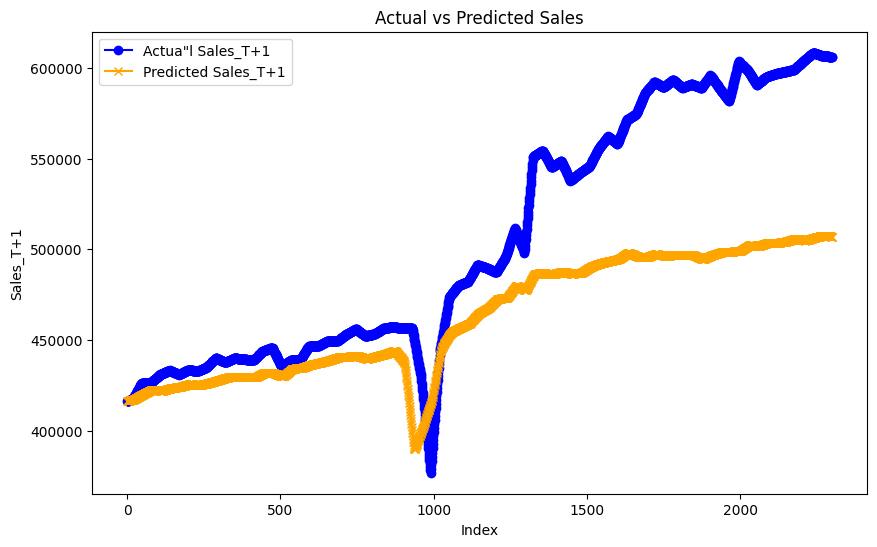

In [263]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 3, look_back = 7)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/3
288/288 [==============================] - 7s 12ms/step - loss: 0.0027
Epoch 2/3
288/288 [==============================] - 3s 11ms/step - loss: 8.1778e-04
Epoch 3/3
72/72 [==============================] - 1s 5ms/step - loss: 0.0181
Mean Squared Error on Test Set: 0.018068522214889526
72/72 [==============================] - 1s 5ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416639.387097         416669.84375
1     416654.161290         416720.28125
2     416668.935484         416770.09375
3     416683.709677         416821.62500
4     416698.483871         416869.68750


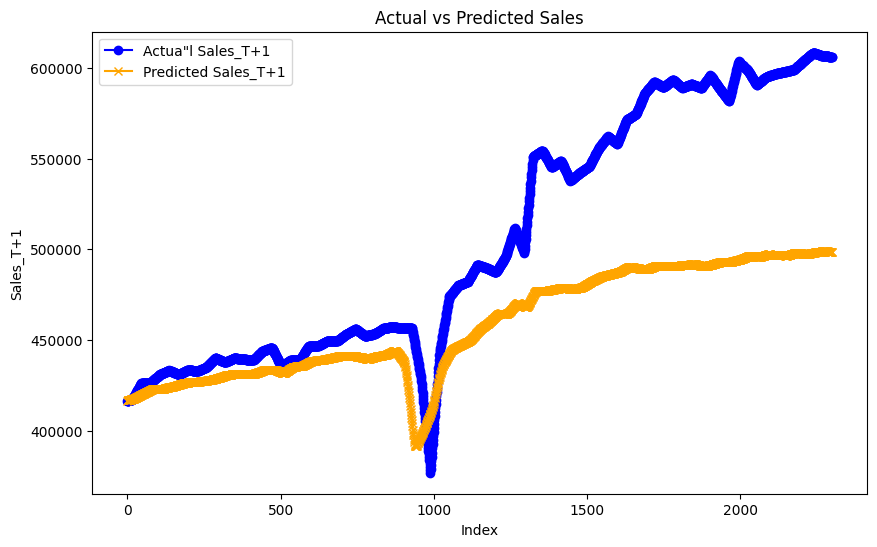

In [266]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 3, look_back = 14)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/3
287/287 [==============================] - 8s 15ms/step - loss: 0.0023
Epoch 2/3
287/287 [==============================] - 4s 14ms/step - loss: 7.5228e-04
Epoch 3/3
72/72 [==============================] - 1s 6ms/step - loss: 0.0285
Mean Squared Error on Test Set: 0.028452454134821892
72/72 [==============================] - 1s 6ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416683.709677         408624.65625
1     416698.483871         408666.25000
2     416713.258065         408710.21875
3     416728.032258         408755.31250
4     416742.806452         408802.81250


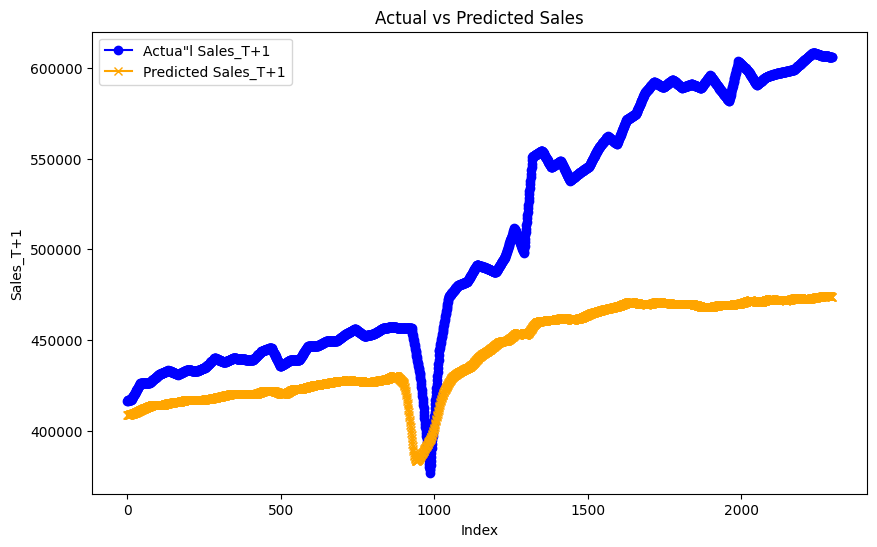

In [264]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 3, look_back = 30)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/10
286/286 [==============================] - 10s 25ms/step - loss: 0.0029
Epoch 2/10
286/286 [==============================] - 7s 24ms/step - loss: 8.5321e-04
Epoch 3/10
286/286 [==============================] - 8s 26ms/step - loss: 6.7200e-04
Epoch 4/10
286/286 [==============================] - 7s 24ms/step - loss: 5.6475e-04
Epoch 5/10
286/286 [==============================] - 7s 24ms/step - loss: 4.8954e-04
Epoch 6/10
286/286 [==============================] - 7s 24ms/step - loss: 4.2463e-04
Epoch 7/10
286/286 [==============================] - 7s 25ms/step - loss: 3.8063e-04
Epoch 8/10
286/286 [==============================] - 8s 28ms/step - loss: 3.4691e-04
Epoch 9/10
286/286 [==============================] - 7s 26ms/step - loss: 3.1055e-04
Epoch 10/10
72/72 [==============================] - 2s 11ms/step - loss: 0.0196
Mean Squared Error on Test Set: 0.019625384360551834
72/72 [==============================] - 2s 11ms/step
   Actual Sales_T+1  Predicted Sales_T+1


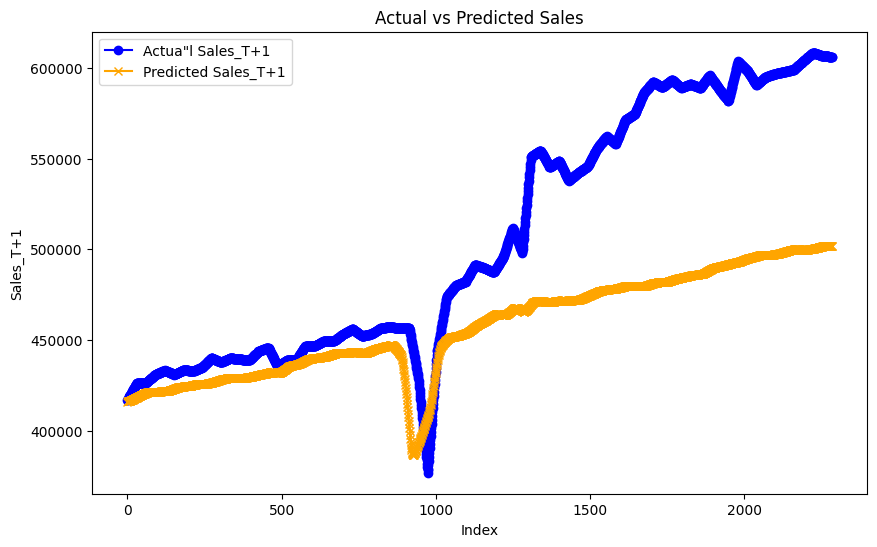

In [268]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 10, look_back = 90)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/5
284/284 [==============================] - 15s 40ms/step - loss: 0.0025
Epoch 2/5
284/284 [==============================] - 12s 44ms/step - loss: 8.2787e-04
Epoch 3/5
284/284 [==============================] - 12s 43ms/step - loss: 6.7174e-04
Epoch 4/5
284/284 [==============================] - 11s 39ms/step - loss: 5.5456e-04
Epoch 5/5
71/71 [==============================] - 2s 19ms/step - loss: 0.0193
Mean Squared Error on Test Set: 0.01925511471927166
71/71 [==============================] - 2s 18ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     422316.161290         416395.81250
1     422619.225806         416484.71875
2     422922.290323         416571.96875
3     423225.354839         416659.00000
4     423528.419355         416744.53125


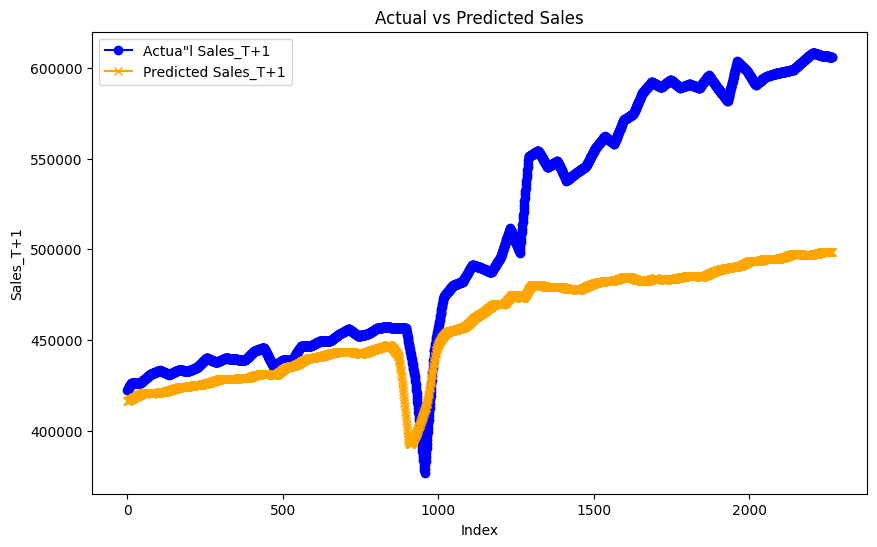

In [270]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 5, look_back = 180)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/5
279/279 [==============================] - 24s 73ms/step - loss: 0.0029
Epoch 2/5
279/279 [==============================] - 20s 72ms/step - loss: 8.3262e-04
Epoch 3/5
279/279 [==============================] - 21s 77ms/step - loss: 6.5976e-04
Epoch 4/5
279/279 [==============================] - 21s 75ms/step - loss: 5.8764e-04
Epoch 5/5
70/70 [==============================] - 3s 35ms/step - loss: 0.0230
Mean Squared Error on Test Set: 0.022976433858275414
70/70 [==============================] - 3s 33ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     426489.833333         419738.75000
1     426500.000000         419809.09375
2     426510.166667         419880.46875
3     426520.333333         419950.40625
4     426530.500000         420018.93750


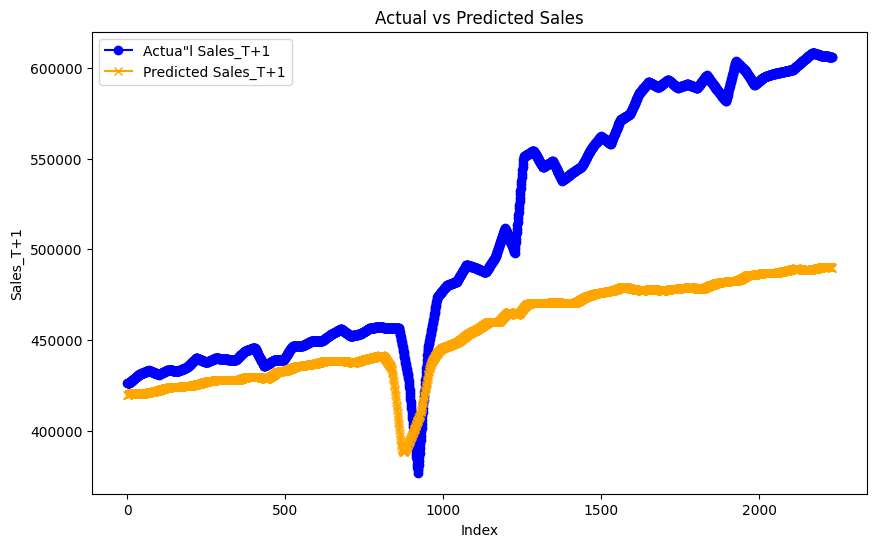

In [271]:
comparison = build_and_evaluate_model(TEST_DAILY, epoch = 5, look_back = 360)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
41/41 [==============================] - 5s 13ms/step - loss: 0.0559
Epoch 2/35
41/41 [==============================] - 1s 14ms/step - loss: 0.0026
Epoch 3/35
41/41 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 4/35
41/41 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 5/35
41/41 [==============================] - 1s 13ms/step - loss: 9.6777e-04
Epoch 6/35
41/41 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 7/35
41/41 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 8/35
41/41 [==============================] - 1s 14ms/step - loss: 9.6973e-04
Epoch 9/35
41/41 [==============================] - 1s 12ms/step - loss: 8.7948e-04
Epoch 10/35
41/41 [==============================] - 1s 13ms/step - loss: 8.7960e-04
Epoch 11/35
41/41 [==============================] - 1s 17ms/step - loss: 9.3151e-04
Epoch 12/35
41/41 [==============================] - 1s 13ms/step - loss: 8.6139e-04
Epoch 13/35
4

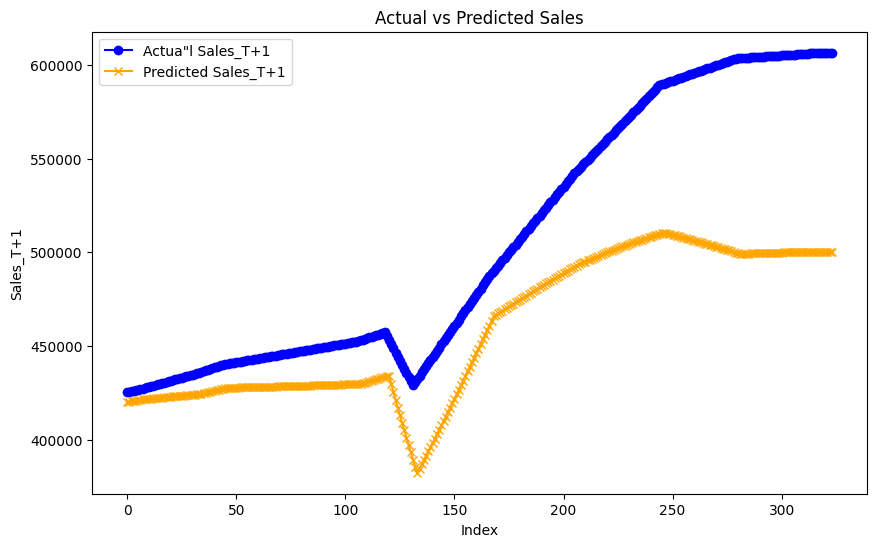

In [272]:
comparison = build_and_evaluate_model(TEST_WEEKLY, epoch = 35, look_back = 1)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
41/41 [==============================] - 5s 20ms/step - loss: 0.0217
Epoch 2/35
41/41 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 3/35
41/41 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 4/35
41/41 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 5/35
41/41 [==============================] - 1s 14ms/step - loss: 9.5537e-04
Epoch 6/35
41/41 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 7/35
41/41 [==============================] - 1s 17ms/step - loss: 9.0038e-04
Epoch 8/35
41/41 [==============================] - 1s 15ms/step - loss: 8.6078e-04
Epoch 9/35
41/41 [==============================] - 1s 19ms/step - loss: 7.2365e-04
Epoch 10/35
41/41 [==============================] - 1s 16ms/step - loss: 7.6112e-04
Epoch 11/35
41/41 [==============================] - 1s 19ms/step - loss: 7.0021e-04
Epoch 12/35
41/41 [==============================] - 1s 15ms/step - loss: 6.3432e-04
Epoch 13/

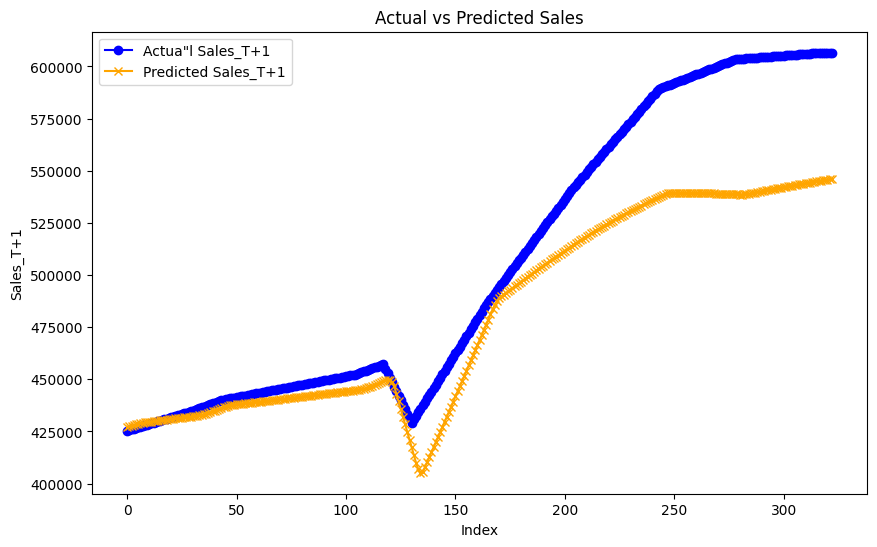

In [273]:
comparison = build_and_evaluate_model(TEST_WEEKLY, epoch = 35, look_back = 4)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
41/41 [==============================] - 4s 15ms/step - loss: 0.0108
Epoch 2/35
41/41 [==============================] - 1s 14ms/step - loss: 0.0017
Epoch 3/35
41/41 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 4/35
41/41 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 5/35
41/41 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 6/35
41/41 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 7/35
41/41 [==============================] - 1s 15ms/step - loss: 8.8320e-04
Epoch 8/35
41/41 [==============================] - 1s 13ms/step - loss: 9.1579e-04
Epoch 9/35
41/41 [==============================] - 1s 13ms/step - loss: 7.8981e-04
Epoch 10/35
41/41 [==============================] - 1s 14ms/step - loss: 7.8329e-04
Epoch 11/35
41/41 [==============================] - 1s 13ms/step - loss: 8.3109e-04
Epoch 12/35
41/41 [==============================] - 1s 14ms/step - loss: 8.2900e-04
Epoch 13/35
4

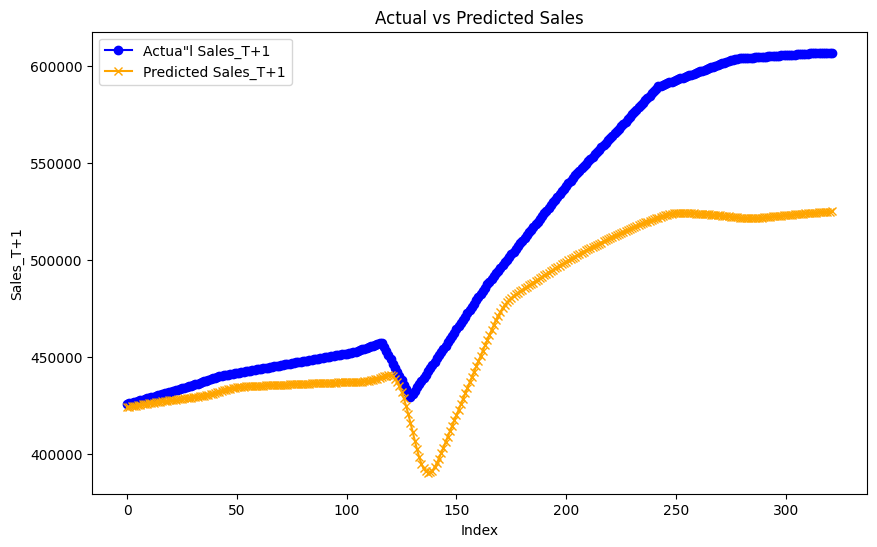

In [274]:
comparison = build_and_evaluate_model(TEST_WEEKLY, epoch = 35, look_back = 12)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
40/40 [==============================] - 4s 22ms/step - loss: 0.0132
Epoch 2/35
40/40 [==============================] - 1s 24ms/step - loss: 0.0020
Epoch 3/35
40/40 [==============================] - 1s 20ms/step - loss: 0.0013
Epoch 4/35
40/40 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 5/35
40/40 [==============================] - 1s 20ms/step - loss: 0.0011
Epoch 6/35
40/40 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 7/35
40/40 [==============================] - 1s 20ms/step - loss: 0.0011
Epoch 8/35
40/40 [==============================] - 1s 21ms/step - loss: 9.4223e-04
Epoch 9/35
40/40 [==============================] - 1s 22ms/step - loss: 8.5954e-04
Epoch 10/35
40/40 [==============================] - 1s 21ms/step - loss: 8.7637e-04
Epoch 11/35
40/40 [==============================] - 1s 18ms/step - loss: 8.7263e-04
Epoch 12/35
40/40 [==============================] - 1s 17ms/step - loss: 7.7237e-04
Epoch 13/35
40/40

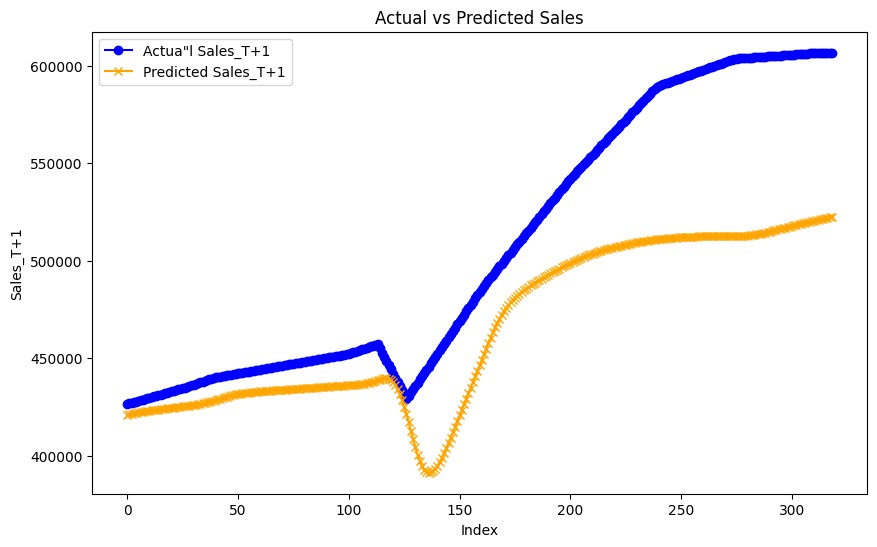

In [275]:
comparison = build_and_evaluate_model(TEST_WEEKLY, epoch = 35, look_back = 26)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
40/40 [==============================] - 4s 24ms/step - loss: 0.0108
Epoch 2/35
40/40 [==============================] - 1s 25ms/step - loss: 0.0020
Epoch 3/35
40/40 [==============================] - 1s 24ms/step - loss: 0.0016
Epoch 4/35
40/40 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 5/35
40/40 [==============================] - 1s 25ms/step - loss: 0.0012
Epoch 6/35
40/40 [==============================] - 1s 24ms/step - loss: 0.0010
Epoch 7/35
40/40 [==============================] - 1s 23ms/step - loss: 9.7557e-04
Epoch 8/35
40/40 [==============================] - 1s 24ms/step - loss: 9.9690e-04
Epoch 9/35
40/40 [==============================] - 1s 24ms/step - loss: 0.0010
Epoch 10/35
40/40 [==============================] - 1s 24ms/step - loss: 9.4032e-04
Epoch 11/35
40/40 [==============================] - 1s 27ms/step - loss: 8.1207e-04
Epoch 12/35
40/40 [==============================] - 1s 31ms/step - loss: 8.3367e-04
Epoch 13/35
40/40

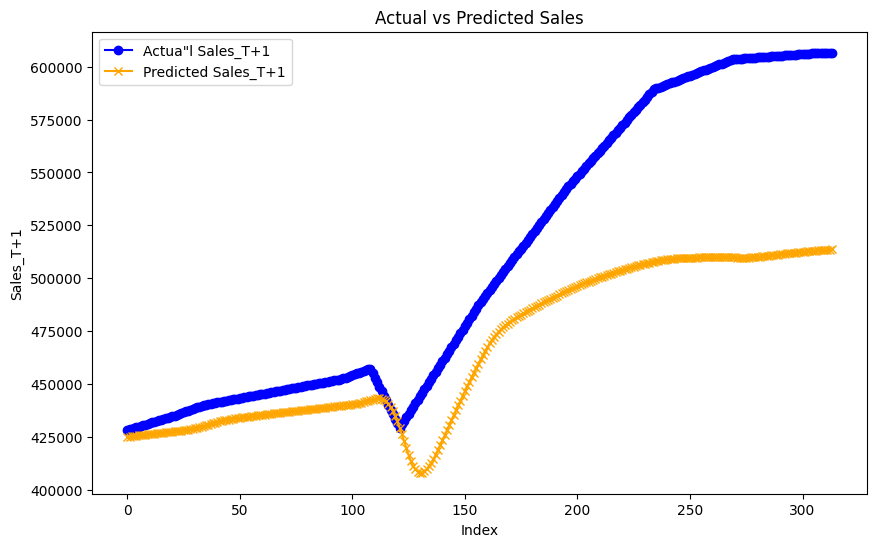

In [276]:
comparison = build_and_evaluate_model(TEST_WEEKLY, epoch = 35, look_back = 52)
actual = comparison['Actual Sales_T+1']
predicted = comparison['Predicted Sales_T+1']

plot_actual_vs_predicted(actual, predicted)

# **Research Question:** _What is the impact of incorporating economic indicators versus time-based features on the accuracy of sales predictions using neural networks?

### For time-based features lets include the following:
- Sales and lagged sales
- rolling mean
- rolling standard deviation
- recession binary

In [23]:
df_time_based = df.copy()
df_time_based = df_time_based[['DATE','sales','Recession']]

### now df_time_based has all of our time-based data (without sales at t+1)
### now to create df_indicators to contain the economic indicator-based data (without sales at t+1)

In [24]:
df_indicators = df.copy()
# add sales t+1 to both dfs
df_time_based = add_sales_t_plus_1(df_time_based)
df_indicators = add_sales_t_plus_1(df_indicators)
# Create an index column from the current index
df_time_based = df_time_based.reset_index(drop=False)
df_time_based.head()

,index,DATE,sales,Recession,sales_T+1
0,0,1992-05-01,149010,0,149800.0
1,1,1992-06-01,149800,0,150761.0
2,2,1992-07-01,150761,0,151067.0
3,3,1992-08-01,151067,0,152588.0
4,4,1992-09-01,152588,0,153521.0


In [25]:
# Ensure the DATE column is in datetime format
df_time_based['DATE'] = pd.to_datetime(df_time_based['DATE'])
df_indicators['DATE'] = pd.to_datetime(df_indicators['DATE'])

# Set the DATE column as the index
df_time_based = df_time_based.set_index('DATE', drop=False)
df_indicators = df_indicators.set_index('DATE', drop=False)

# Resampling df_time_based to daily frequency
df_time_based_daily = df_time_based.resample('D').interpolate(method='linear')

# Resampling df_time_based to weekly frequency (starting on the same weekday as the first entry)
df_time_based_weekly = df_time_based.resample('W').interpolate(method='linear')

# Resampling df_indicators to daily frequency
df_indicators_daily = df_indicators.resample('D').interpolate(method='linear')

# Resampling df_indicators to weekly frequency
df_indicators_weekly = df_indicators.resample('W').interpolate(method='linear')

In [26]:
df_time_based_weekly.dropna(inplace=True)

In [27]:
df_indicators_weekly.dropna(inplace=True)

In [28]:
df_time_based.drop(columns=['DATE'], inplace = True)
df_time_based#done 

,index,sales,Recession,sales_T+1
DATE,,,,
1992-05-01,0,149010,0,149800.0
1992-06-01,1,149800,0,150761.0
1992-07-01,2,150761,0,151067.0
1992-08-01,3,151067,0,152588.0
1992-09-01,4,152588,0,153521.0
...,...,...,...,...
2023-06-01,373,597826,0,599037.0
2023-07-01,374,599037,0,603784.0
2023-08-01,375,603784,0,608307.0


In [29]:
df_time_based_daily = df_time_based_daily.reset_index(drop=True)
df_time_based_daily['index'] = df_time_based_daily.index
df_time_based_daily.drop(columns=['DATE'], inplace = True)
df_time_based_daily#done 

,index,sales,Recession,sales_T+1
0,0,149010.000000,0.0,149800.0
1,1,149035.483871,0.0,149831.0
2,2,149060.967742,0.0,149862.0
3,3,149086.451613,0.0,149893.0
4,4,149111.935484,0.0,149924.0
...,...,...,...,...
11471,11471,606824.133333,0.0,606109.8
11472,11472,606767.100000,0.0,606091.1
11473,11473,606710.066667,0.0,606072.4
11474,11474,606653.033333,0.0,606053.7


In [30]:
df_time_based_weekly = df_time_based_weekly.reset_index(drop=True)
df_time_based_weekly['index'] = df_time_based_weekly.index
df_time_based_weekly.drop(columns=['DATE'], inplace = True)
df_time_based_weekly#done 

,index,sales,Recession,sales_T+1
0,0,153583.000000,0.0,155614.0
1,1,153811.794872,0.0,155810.0
2,2,154040.589744,0.0,156006.0
3,3,154269.384615,0.0,156202.0
4,4,154498.179487,0.0,156398.0
...,...,...,...,...
1609,1609,606278.051282,0.0,605239.0
1610,1610,606357.538462,0.0,605438.0
1611,1611,606437.025641,0.0,605637.0
1612,1612,606516.512821,0.0,605836.0


In [31]:
df_indicators.drop(columns=['sales','DATE','Unnamed: 0'], inplace = True)
df_indicators #done 

,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,UNEMPLOY,RETAILIMSA,...,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_T+1
DATE,,,,,,,,,,,,,,,,,,,,,
1992-05-01,6363.102000,1.491591,1.895000,408.937,470.2,0.143369,79.2,66.6,9850,255808,...,8.840000,1139,4204.8,352.2,108799,12.853,-2781,8.6,0,149800.0
1992-06-01,6464.871500,1.252855,1.913000,412.160,480.4,0.357910,80.4,66.7,9787,254217,...,8.710000,1226,4220.9,351.9,108923,12.873,-4455,8.8,0,150761.0
1992-07-01,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,9781,254826,...,8.580000,1186,4255.3,348.3,108954,13.378,-3530,8.6,0,151067.0
1992-08-01,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,9398,255151,...,8.450000,1244,4284.7,350.8,109135,13.655,-3520,9.0,0,152588.0
1992-09-01,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,9565,256549,...,8.320000,1214,4300.5,348.7,109280,13.218,-3968,9.0,0,153521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,27427.756000,8.005603,1.320333,1620.801,980.1,0.322891,64.2,62.6,6340,769415,...,6.744286,1305,18651.6,1540.0,156421,15.840,-59631,8.8,0,599037.0
2023-07-01,27610.128000,5.104710,1.330000,1620.801,890.7,0.190752,71.5,62.6,6347,774984,...,6.721429,1363,18791.5,1573.6,156667,16.270,-62222,9.1,0,603784.0
2023-08-01,27725.751333,4.306426,1.336667,1620.801,909.4,0.436716,69.4,62.8,6443,775813,...,6.698571,1365,18826.8,1606.2,156832,15.919,-64333,8.6,0,608307.0


In [32]:
df_indicators_daily.drop(columns=['sales','DATE','Unnamed: 0'], inplace = True)
df_indicators_daily #done

,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,UNEMPLOY,RETAILIMSA,...,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_T+1
DATE,,,,,,,,,,,,,,,,,,,,,
1992-05-01,6363.102000,1.491591,1.895000,408.937000,470.200000,0.143369,79.200000,66.600000,9850.000000,255808.000000,...,8.840000,1139.000000,4204.800000,352.200000,108799.000000,12.853000,-2781.000000,8.600000,0.0,149800.0
1992-05-02,6366.384887,1.483890,1.895581,409.040968,470.529032,0.150290,79.238710,66.603226,9847.967742,255756.677419,...,8.835806,1141.806452,4205.319355,352.190323,108803.000000,12.853645,-2835.000000,8.606452,0.0,149831.0
1992-05-03,6369.667774,1.476188,1.896161,409.144935,470.858065,0.157211,79.277419,66.606452,9845.935484,255705.354839,...,8.831613,1144.612903,4205.838710,352.180645,108807.000000,12.854290,-2889.000000,8.612903,0.0,149862.0
1992-05-04,6372.950661,1.468487,1.896742,409.248903,471.187097,0.164131,79.316129,66.609677,9843.903226,255654.032258,...,8.827419,1147.419355,4206.358065,352.170968,108811.000000,12.854935,-2943.000000,8.619355,0.0,149893.0
1992-05-05,6376.233548,1.460786,1.897323,409.352871,471.516129,0.171052,79.354839,66.612903,9841.870968,255602.709677,...,8.823226,1150.225806,4206.877419,352.161290,108815.000000,12.855581,-2997.000000,8.625806,0.0,149924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,27941.581556,3.201497,1.349111,1620.801000,782.413333,-0.000091,64.333333,62.713333,6267.200000,778815.666667,...,6.655905,1560.266667,18998.940000,1654.553333,157265.333333,16.499600,-64893.533333,9.606667,0.0,606109.8
2023-09-28,27945.435667,3.196842,1.349333,1620.801000,782.060000,-0.009653,64.200000,62.710000,6267.400000,779015.000000,...,6.655143,1562.200000,19002.630000,1655.090000,157275.000000,16.518200,-64898.900000,9.630000,0.0,606091.1
2023-09-29,27949.289778,3.192187,1.349556,1620.801000,781.706667,-0.019215,64.066667,62.706667,6267.600000,779214.333333,...,6.654381,1564.133333,19006.320000,1655.626667,157284.666667,16.536800,-64904.266667,9.653333,0.0,606072.4


In [33]:
# df_indicators_weekly.drop(columns=['sales','DATE','Unnamed: 0'], inplace = True)
df_indicators_weekly #done

,Unnamed: 0,DATE,sales,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,...,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_T+1
DATE,,,,,,,,,,,,,,,,,,,,,
1992-11-01,563.000000,1992-11-01,153583.000000,6697.021667,0.907034,1.957667,428.275000,380.300000,0.141044,85.300000,...,8.060000,1210.000000,4340.700000,344.300000,109795.000000,13.457000,-3871.000000,8.600000,0.0,155614.0
1992-11-08,563.230769,1992-11-08,153811.794872,6702.892342,0.907214,1.958897,428.906665,380.325641,0.144530,85.094872,...,8.030000,1214.666667,4345.625641,344.171795,109844.717949,13.494282,-3940.820513,8.584615,0.0,155810.0
1992-11-15,563.461538,1992-11-15,154040.589744,6708.763017,0.907394,1.960128,429.538329,380.351282,0.148016,84.889744,...,8.000000,1219.333333,4350.551282,344.043590,109894.435897,13.531564,-4010.641026,8.569231,0.0,156006.0
1992-11-22,563.692308,1992-11-22,154269.384615,6714.633692,0.907575,1.961359,430.169994,380.376923,0.151503,84.684615,...,7.970000,1224.000000,4355.476923,343.915385,109944.153846,13.568846,-4080.461538,8.553846,0.0,156202.0
1992-11-29,563.923077,1992-11-29,154498.179487,6720.504368,0.907755,1.962590,430.801658,380.402564,0.154989,84.479487,...,7.940000,1228.666667,4360.402564,343.787179,109993.871795,13.606128,-4150.282051,8.538462,0.0,156398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-03,933.076923,2023-09-03,606278.051282,27839.726513,2.995501,1.341897,1620.801000,790.241026,0.047598,63.912821,...,6.651538,1544.820513,18938.715385,1620.761538,157088.820513,16.457590,-64443.820513,9.566667,0.0,605239.0
2023-09-10,933.307692,2023-09-10,606357.538462,27869.044385,3.042344,1.343923,1620.801000,787.930769,0.026114,63.884615,...,6.651868,1550.615385,18957.461538,1629.746154,157142.615385,16.486692,-64561.615385,9.600000,0.0,605438.0
2023-09-17,933.538462,2023-09-17,606437.025641,27898.362256,3.089188,1.345949,1620.801000,785.620513,0.004630,63.856410,...,6.652198,1556.410256,18976.207692,1638.730769,157196.410256,16.515795,-64679.410256,9.633333,0.0,605637.0


In [34]:
def preprocess_data_custom(df, columnstodrop, targetedcolumn, look_back=1):
    # Drop the specified columns and separate features and target
    features = df.drop(columns=columnstodrop)
    target = df[targetedcolumn].values.reshape(-1, 1)

    # Scale the features
    feature_scaler = MinMaxScaler()
    scaled_features = feature_scaler.fit_transform(features)

    # Scale the target
    target_scaler = MinMaxScaler()
    scaled_target = target_scaler.fit_transform(target)

    # Convert scaled features and target into a DataFrame for LSTM input preparation
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled[targetedcolumn] = scaled_target

    # Create LSTM input data using the look-back period
    X, y = create_lstm_input_data(df_scaled, look_back=look_back)

    return X, y, target_scaler  # Return the scaler for inverse transforming predictions

In [35]:
df_time_based

,index,sales,Recession,sales_T+1
DATE,,,,
1992-05-01,0,149010,0,149800.0
1992-06-01,1,149800,0,150761.0
1992-07-01,2,150761,0,151067.0
1992-08-01,3,151067,0,152588.0
1992-09-01,4,152588,0,153521.0
...,...,...,...,...
2023-06-01,373,597826,0,599037.0
2023-07-01,374,599037,0,603784.0
2023-08-01,375,603784,0,608307.0


Epoch 1/50
10/10 [==============================] - 3s 12ms/step - loss: 0.1041
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0753
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0369
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 8/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 10/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 11/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 12/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 13/50
10/10 [========================

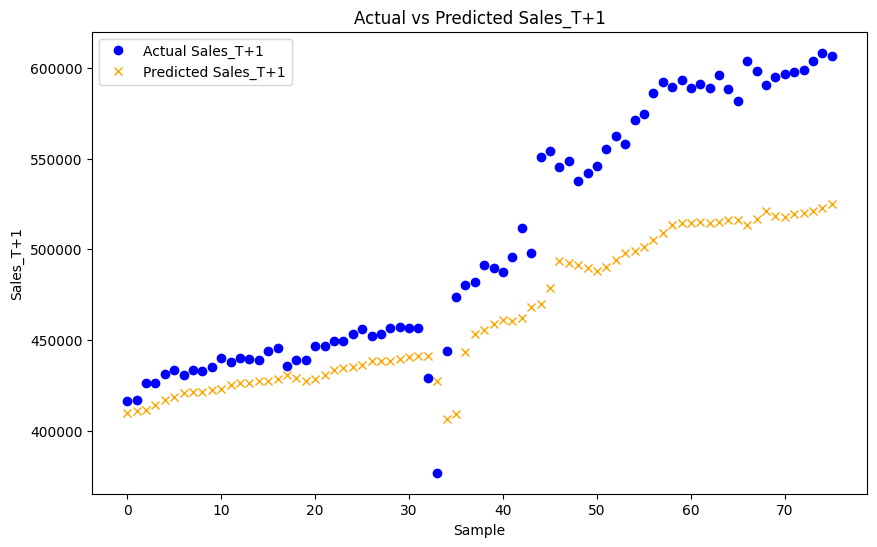

In [406]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_time_based, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=50, 
    look_back=1, 
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/7
287/287 [==============================] - 7s 14ms/step - loss: 0.0026
Epoch 2/7
287/287 [==============================] - 4s 13ms/step - loss: 8.2016e-04
Epoch 3/7
287/287 [==============================] - 4s 13ms/step - loss: 6.5351e-04
Epoch 4/7
287/287 [==============================] - 4s 13ms/step - loss: 6.0488e-04
Epoch 5/7
287/287 [==============================] - 4s 13ms/step - loss: 5.1047e-04
Epoch 6/7
287/287 [==============================] - 4s 13ms/step - loss: 3.8149e-04
Epoch 7/7
72/72 [==============================] - 1s 6ms/step - loss: 0.0036
Mean Squared Error on Test Set: 0.003590176347643137
72/72 [==============================] - 1s 6ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416378.333333         409685.93750
1     416383.266667         409690.40625
2     416388.200000         409697.03125
3     416393.133333         409698.87500
4     416398.066667         409702.93750


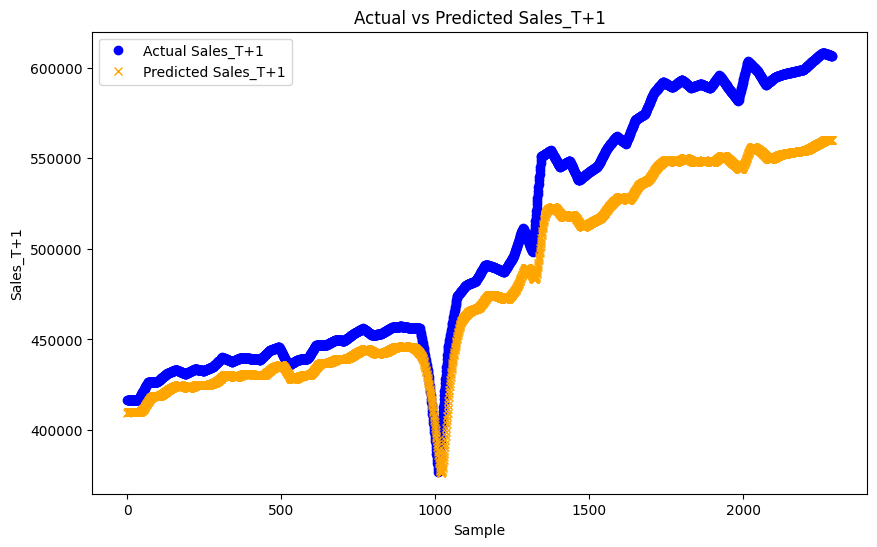

In [407]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_time_based_daily, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=7, 
    look_back=30, 
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
41/41 [==============================] - 4s 12ms/step - loss: 0.0239
Epoch 2/35
41/41 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 3/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 4/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 5/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 6/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 7/35
41/41 [==============================] - 0s 9ms/step - loss: 9.9658e-04
Epoch 8/35
41/41 [==============================] - 0s 10ms/step - loss: 9.8382e-04
Epoch 9/35
41/41 [==============================] - 0s 10ms/step - loss: 8.4296e-04
Epoch 10/35
41/41 [==============================] - 0s 9ms/step - loss: 8.1240e-04
Epoch 11/35
41/41 [==============================] - 0s 10ms/step - loss: 8.5729e-04
Epoch 12/35
41/41 [==============================] - 0s 10ms/step - loss: 7.7322e-04
Epoch 13/35
41/41 [

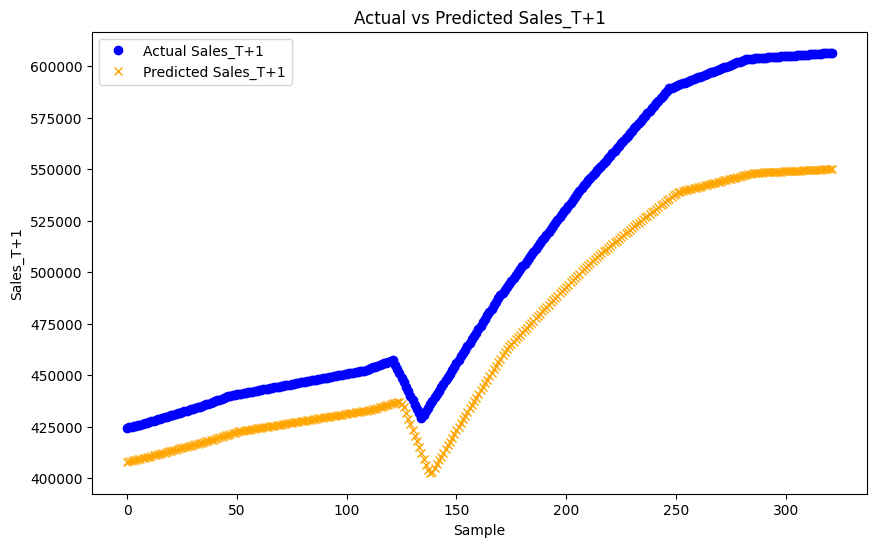

In [408]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_time_based_weekly, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=35, 
    look_back=4, 
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/140
10/10 [==============================] - 3s 11ms/step - loss: 0.1049
Epoch 2/140
10/10 [==============================] - 0s 10ms/step - loss: 0.0778
Epoch 3/140
10/10 [==============================] - 0s 11ms/step - loss: 0.0427
Epoch 4/140
10/10 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 5/140
10/10 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 6/140
10/10 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 7/140
10/10 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 8/140
10/10 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 9/140
10/10 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 10/140
10/10 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 11/140
10/10 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 12/140
10/10 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 13/140
10/10 [===========

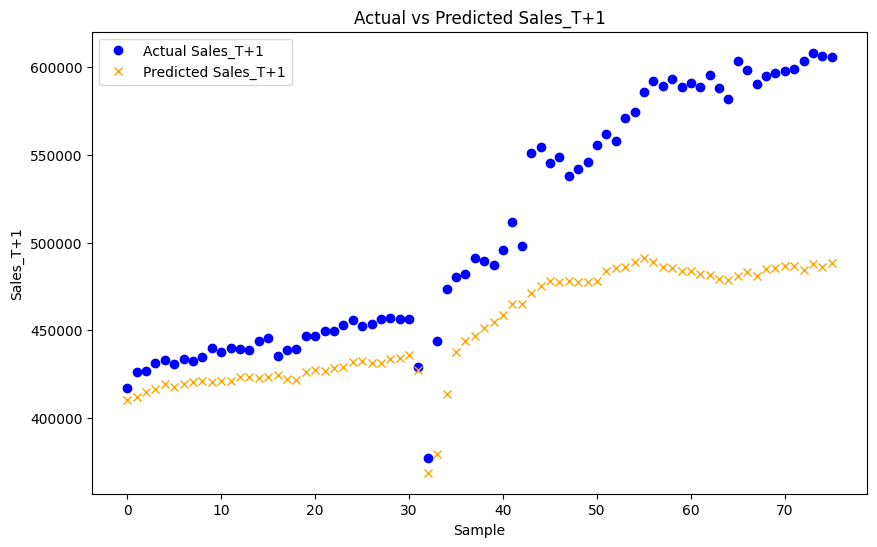

In [426]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=140, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/5
287/287 [==============================] - 6s 9ms/step - loss: 0.0094
Epoch 2/5
287/287 [==============================] - 2s 8ms/step - loss: 8.7306e-04
Epoch 3/5
287/287 [==============================] - 2s 8ms/step - loss: 7.7906e-04
Epoch 4/5
287/287 [==============================] - 2s 9ms/step - loss: 6.8033e-04
Epoch 5/5
72/72 [==============================] - 1s 5ms/step - loss: 0.0253
Mean Squared Error on Test Set: 0.025302056223154068
72/72 [==============================] - 2s 5ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416693.066667         403840.84375
1     416708.333333         403890.12500
2     416723.600000         403922.37500
3     416738.866667         404033.00000
4     416754.133333         404072.18750


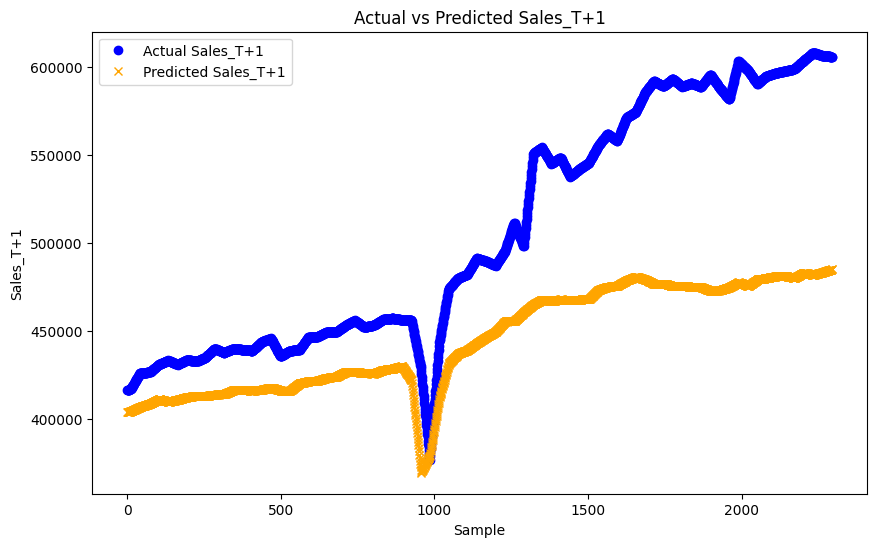

In [423]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_daily, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=5, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/35
41/41 [==============================] - 4s 11ms/step - loss: 0.0557
Epoch 2/35
41/41 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 3/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 4/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 5/35
41/41 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 6/35
41/41 [==============================] - 0s 9ms/step - loss: 9.9966e-04
Epoch 7/35
41/41 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 8/35
41/41 [==============================] - 0s 9ms/step - loss: 9.5902e-04
Epoch 9/35
41/41 [==============================] - 0s 9ms/step - loss: 8.5795e-04
Epoch 10/35
41/41 [==============================] - 0s 9ms/step - loss: 8.5748e-04
Epoch 11/35
41/41 [==============================] - 0s 9ms/step - loss: 8.1665e-04
Epoch 12/35
41/41 [==============================] - 0s 9ms/step - loss: 8.9202e-04
Epoch 13/35
41/41 [=====

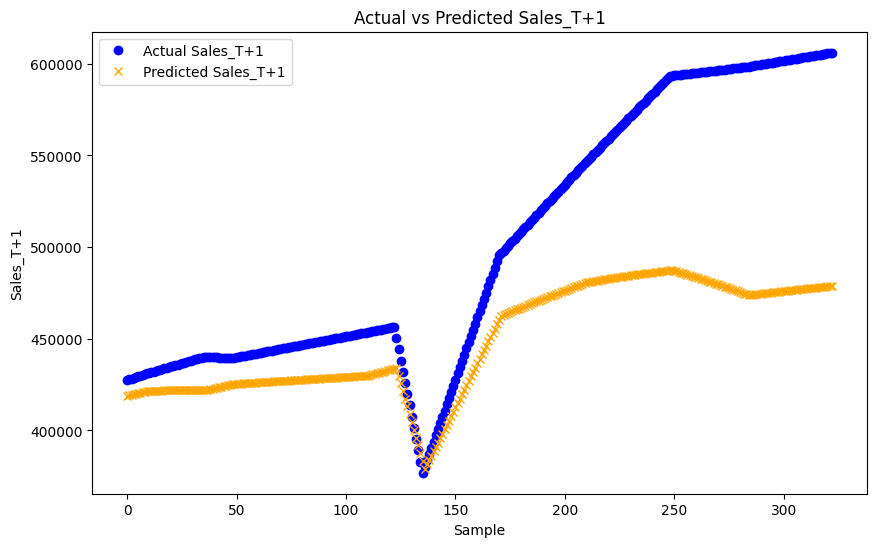

In [425]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_weekly, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=35, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

# NEW CUSTOM FUNCTION

In [45]:
def build_and_evaluate_modelcustom(df, columnstodrop, targetedcolumn, epoch=50, look_back=30, n_components=7):
    # Add sales_t_plus_1 column (if needed)
    # df = add_sales_t_plus_1(df)
    
    # Preprocess the data
    X, y, target_scaler = preprocess_data_custom(df, columnstodrop, targetedcolumn, look_back=look_back)
    
    # Perform a random 80/20 train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build and train LSTM model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    # Evaluate the model
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison

Epoch 1/6
287/287 [==============================] - 7s 9ms/step - loss: 0.0188
Epoch 2/6
287/287 [==============================] - 2s 9ms/step - loss: 0.0019
Epoch 3/6
287/287 [==============================] - 2s 9ms/step - loss: 0.0017
Epoch 4/6
287/287 [==============================] - 2s 8ms/step - loss: 0.0016
Epoch 5/6
287/287 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 6/6
72/72 [==============================] - 1s 4ms/step - loss: 1.1432e-04
Mean Squared Error on Test Set: 0.00011432085011620075
72/72 [==============================] - 1s 3ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     599284.709677         597739.75000
1     444372.700000         445291.03125
2     341476.806452         342215.18750
3     403778.838710         406949.15625
4     432774.000000         435205.87500


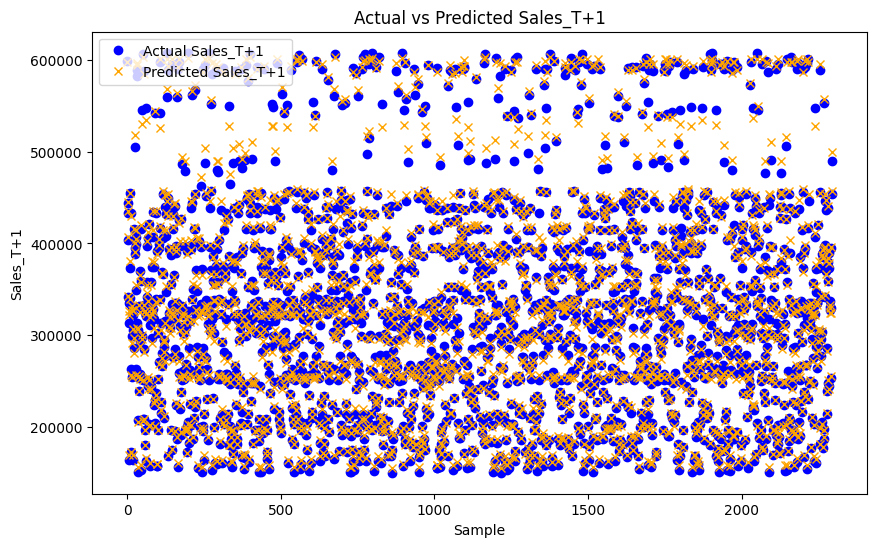

In [429]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_daily, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=6, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/180
10/10 [==============================] - 6s 12ms/step - loss: 0.2031 - accuracy: 0.0000e+00
Epoch 2/180
10/10 [==============================] - 0s 11ms/step - loss: 0.1574 - accuracy: 0.0000e+00
Epoch 3/180
10/10 [==============================] - 0s 11ms/step - loss: 0.0865 - accuracy: 0.0000e+00
Epoch 4/180
10/10 [==============================] - 0s 11ms/step - loss: 0.0117 - accuracy: 0.0033
Epoch 5/180
10/10 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 0.0033
Epoch 6/180
10/10 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 0.0033
Epoch 7/180
10/10 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 0.0033
Epoch 8/180
10/10 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.0033
Epoch 9/180
10/10 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.0033
Epoch 10/180
10/10 [==============================] - 0s 9ms/step - loss: 0.0019 - accurac

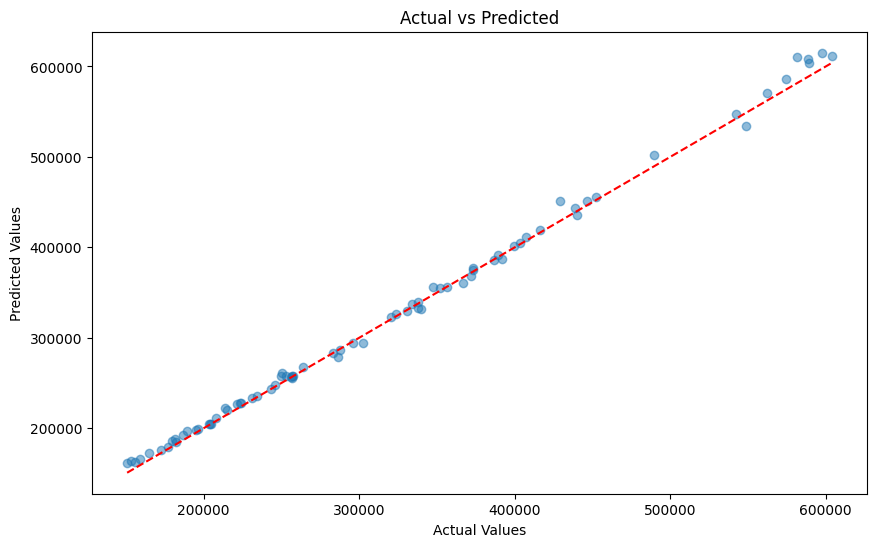

In [451]:
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=180, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

Epoch 1/180
41/41 [==============================] - 4s 11ms/step - loss: 0.1021 - accuracy: 7.7519e-04
Epoch 2/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0046 - accuracy: 7.7519e-04
Epoch 3/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 7.7519e-04
Epoch 4/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 7.7519e-04
Epoch 5/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 7.7519e-04
Epoch 6/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 7.7519e-04
Epoch 7/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 7.7519e-04
Epoch 8/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 7.7519e-04
Epoch 9/180
41/41 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 7.7519e-04
Epoch 10/180
41/41 [==============================] - 0s 10ms/step - los

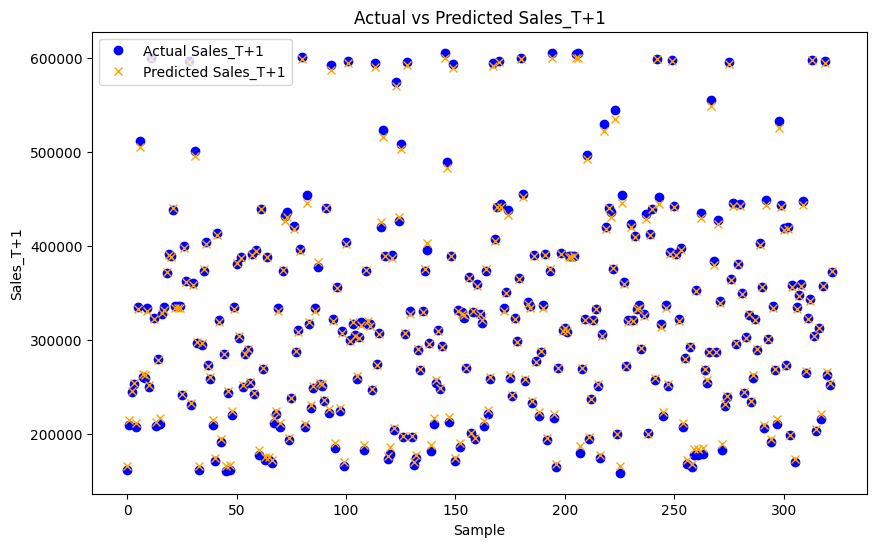

In [433]:
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_weekly, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=180, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

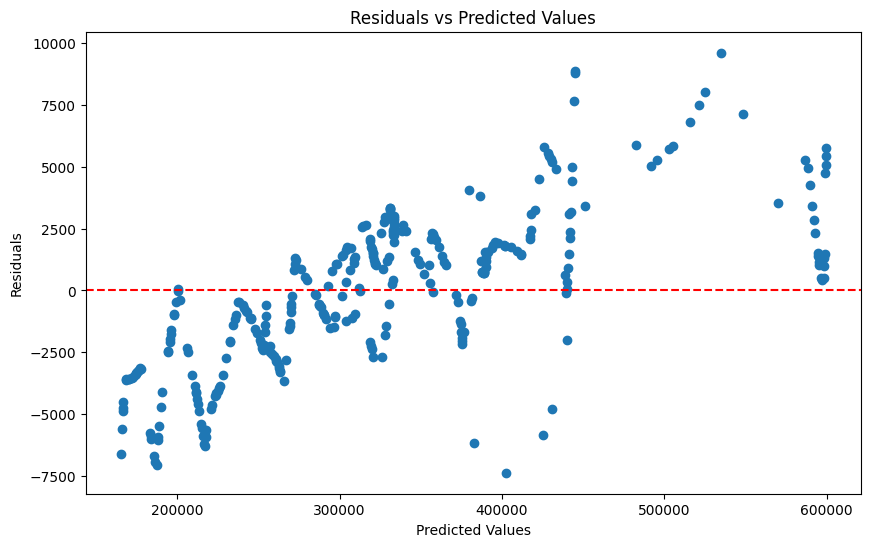

In [439]:
residuals = actual - predicted
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


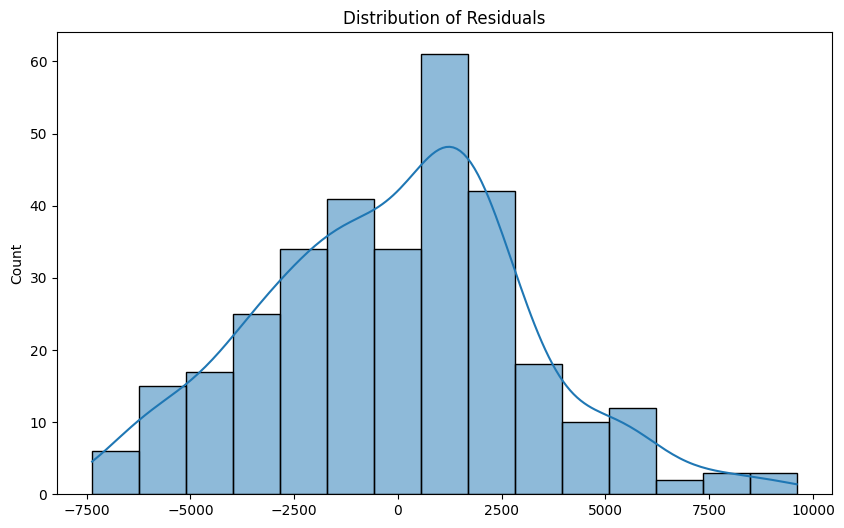

In [435]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()


In [436]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual, predicted)
rmse = mean_squared_error(actual, predicted, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 2543.5101154182876
Root Mean Squared Error (RMSE): 3173.4381775831466


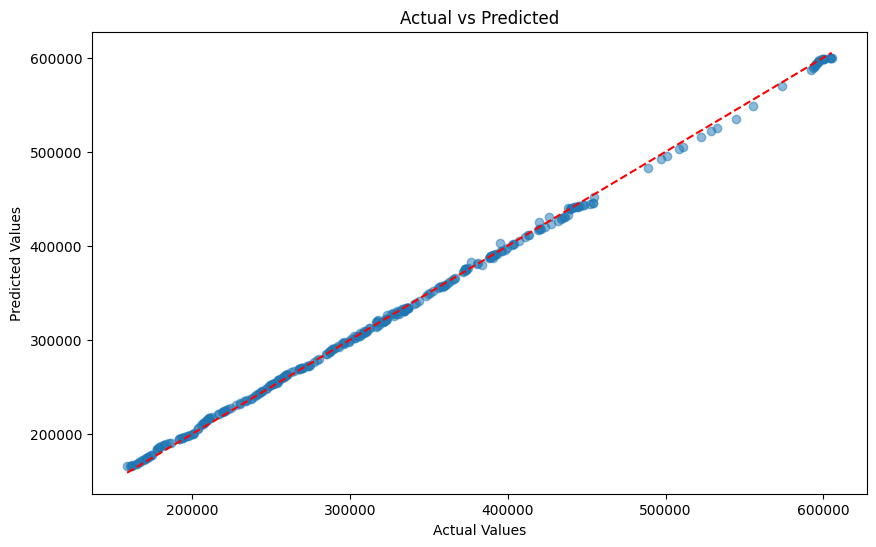

In [440]:
def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--')  # Diagonal line
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Example usage:
plot_actual_vs_predicted(actual, predicted)

Epoch 1/6
287/287 [==============================] - 8s 14ms/step - loss: 0.0042 - accuracy: 1.0922e-04
Epoch 2/6
287/287 [==============================] - 4s 14ms/step - loss: 0.0017 - accuracy: 1.0922e-04
Epoch 3/6
287/287 [==============================] - 4s 14ms/step - loss: 0.0014 - accuracy: 1.0922e-04
Epoch 4/6
287/287 [==============================] - 4s 14ms/step - loss: 0.0012 - accuracy: 1.0922e-04
Epoch 5/6
287/287 [==============================] - 4s 14ms/step - loss: 0.0011 - accuracy: 1.0922e-04
Epoch 6/6
72/72 [==============================] - 1s 7ms/step - loss: 3.2155e-04 - accuracy: 0.0000e+00
Mean Squared Error on Test Set: [0.0003215470933355391, 0.0]
72/72 [==============================] - 1s 6ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     396808.129032         384291.21875
1     313467.516129         314995.46875
2     452237.258065         440341.00000
3     208214.548387         209078.84375
4     444629.100000         430019.90625


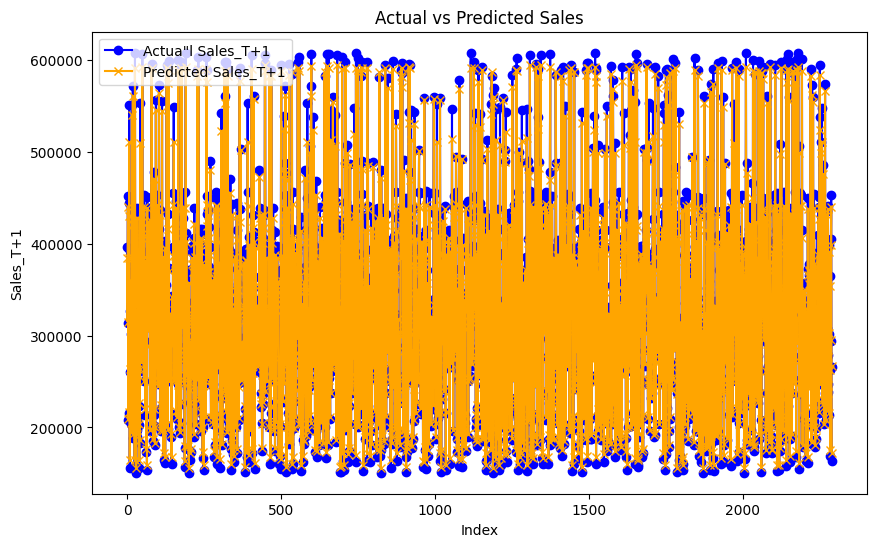

In [449]:
# Run the model
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_daily, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=6, 
    look_back=30
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

In [1]:
def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--')  # Diagonal line
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Example usage:
plot_actual_vs_predicted(actual, predicted)

NameError: name 'actual' is not defined

# trying to split the data randomly for training and sequential for testing

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def build_and_evaluate_modelcustom(df, columnstodrop, targetedcolumn, epoch=50, look_back=30):
    # Preprocess the data
    X, y, target_scaler = preprocess_data_custom(df, columnstodrop, targetedcolumn, look_back=look_back)
    
    # Split the data into the first 80% and the last 20%
    test_start_index = int(len(X) * 0.80)
    X_first_80, X_last_20 = X[:test_start_index], X[test_start_index:]
    y_first_80, y_last_20 = y[:test_start_index], y[test_start_index:]
    
    # Shuffle the first 80% for training
    X_train, y_train = shuffle(X_first_80, y_first_80, random_state=42)
    
    # Use the last 20% for testing
    X_test, y_test = X_last_20, y_last_20
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    # Evaluate the model
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison


72/72 [==============================] - 1s 5ms/step - loss: 0.0266 - accuracy: 4.3573e-04
Mean Squared Error on Test Set: [0.026586638763546944, 0.0004357298603281379]
72/72 [==============================] - 1s 3ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     416693.066667         408972.78125
1     416708.333333         408971.59375
2     416723.600000         409000.84375
3     416738.866667         409010.15625
4     416754.133333         409058.12500


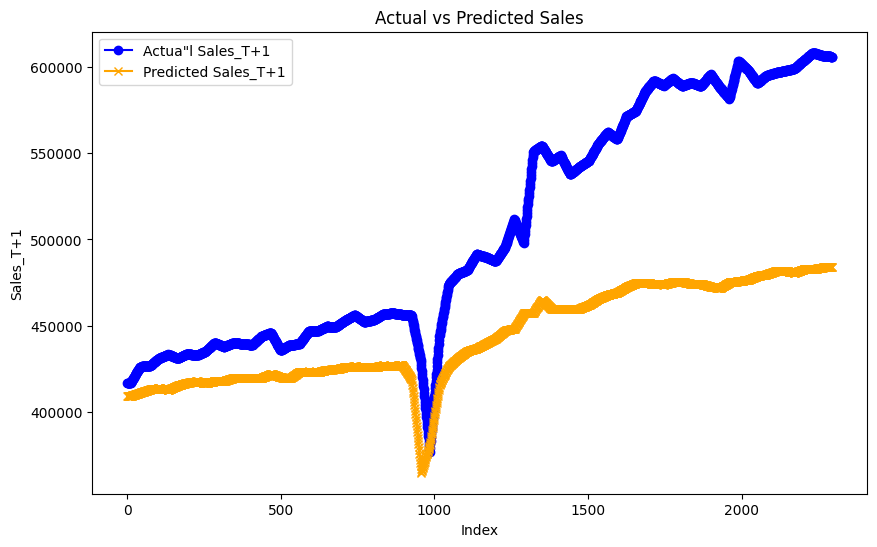

In [73]:
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_daily, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=1, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

In [74]:
def build_and_evaluate_modelcustom(df, columnstodrop, targetedcolumn, epoch=50, look_back=30, n_components=7):
    # Add sales_t_plus_1 column (if needed)
    # df = add_sales_t_plus_1(df)
    
    # Preprocess the data
    X, y, target_scaler = preprocess_data_custom(df, columnstodrop, targetedcolumn, look_back=look_back)
    
    # Perform a random 80/20 train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
    
    # Build and train LSTM model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, epoch)
    
    # Evaluate the model
    comparison = evaluate_model(model, X_test, y_test, target_scaler)
    
    return comparison

Epoch 1/2
287/287 [==============================] - 6s 10ms/step - loss: 0.0153 - accuracy: 1.0893e-04
Epoch 2/2
72/72 [==============================] - 1s 5ms/step - loss: 4.5744e-04 - accuracy: 0.0000e+00
Mean Squared Error on Test Set: [0.0004574403865262866, 0.0]
72/72 [==============================] - 1s 3ms/step
   Actual Sales_T+1  Predicted Sales_T+1
0     445398.300000         431637.87500
1     388909.806452         375450.56250
2     403577.333333         395962.50000
3     381496.806452         377405.71875
4     331893.900000         320337.96875


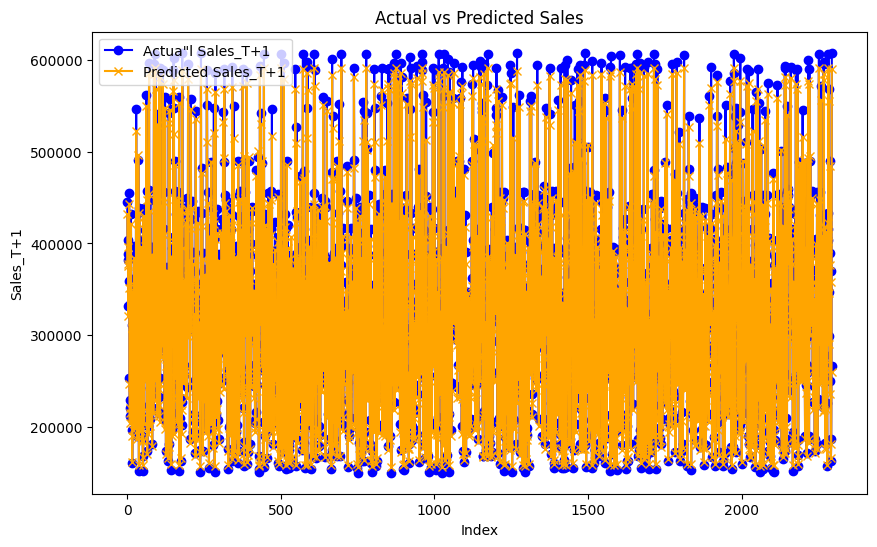

In [75]:
comparison_time_based = build_and_evaluate_modelcustom(
    df_indicators_daily, 
    columnstodrop=['sales_T+1'], 
    targetedcolumn='sales_T+1', 
    epoch=2, 
    look_back=1
)

# Plot the results
actual = comparison_time_based['Actual Sales_T+1']
predicted = comparison_time_based['Predicted Sales_T+1']
plot_actual_vs_predicted(actual, predicted)

In [78]:
df_indicators

,GDP,REAINTRATREARAT1YE,M2V,PTN0181A027NBEA,PMSAVE,CPALTT01USM657N,UMCSENT,`x,UNEMPLOY,RETAILIMSA,...,MORTGAGE30US,HOUST,PCE,RMFSL,PAYEMS,TOTALSA,BOPGSTB,UEMPMED,Recession,sales_T+1
DATE,,,,,,,,,,,,,,,,,,,,,
1992-05-01,6363.102000,1.491591,1.895000,408.937,470.2,0.143369,79.2,66.6,9850,255808,...,8.840000,1139,4204.8,352.2,108799,12.853,-2781,8.6,0,149800.0
1992-06-01,6464.871500,1.252855,1.913000,412.160,480.4,0.357910,80.4,66.7,9787,254217,...,8.710000,1226,4220.9,351.9,108923,12.873,-4455,8.8,0,150761.0
1992-07-01,6566.641000,1.253858,1.931000,415.383,458.6,0.213980,76.6,66.7,9781,254826,...,8.580000,1186,4255.3,348.3,108954,13.378,-3530,8.6,0,151067.0
1992-08-01,6604.695000,1.068700,1.937667,418.606,466.4,0.284698,76.1,66.6,9398,255151,...,8.450000,1244,4284.7,350.8,109135,13.655,-3520,9.0,0,152588.0
1992-09-01,6642.749000,0.983475,1.944333,421.829,417.5,0.283889,75.6,66.5,9565,256549,...,8.320000,1214,4300.5,348.7,109280,13.218,-3968,9.0,0,153521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,27427.756000,8.005603,1.320333,1620.801,980.1,0.322891,64.2,62.6,6340,769415,...,6.744286,1305,18651.6,1540.0,156421,15.840,-59631,8.8,0,599037.0
2023-07-01,27610.128000,5.104710,1.330000,1620.801,890.7,0.190752,71.5,62.6,6347,774984,...,6.721429,1363,18791.5,1573.6,156667,16.270,-62222,9.1,0,603784.0
2023-08-01,27725.751333,4.306426,1.336667,1620.801,909.4,0.436716,69.4,62.8,6443,775813,...,6.698571,1365,18826.8,1606.2,156832,15.919,-64333,8.6,0,608307.0


In [81]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


X = df_indicators.drop(columns=['sales_T+1'])
y = df_indicators['sales_T+1']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

model = RandomForestRegressor(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_scaled, y_scaled, cv=kf, scoring='neg_mean_squared_error')

cv_mse_scores = -cv_scores
cv_mean_score = np.mean(cv_mse_scores)
cv_std_score = np.std(cv_mse_scores)

print(f'Mean Cross-Validation MSE (scaled): {cv_mean_score}')
print(f'Standard Deviation of Cross-Validation MSE (scaled): {cv_std_score}')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_scaled = model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse_test = mean_squared_error(y_test_original, y_pred)
print(f'MSE on Test Set (original scale): {mse_test}')


Mean Cross-Validation MSE (scaled): 0.002596943561265337
Standard Deviation of Cross-Validation MSE (scaled): 0.0016494532107157267
MSE on Test Set (original scale): 9332399.939059213


need to scale and inverse test, don't forget